## **End to End Palmer Penguins Data Science Project**
**Meet the penguins**
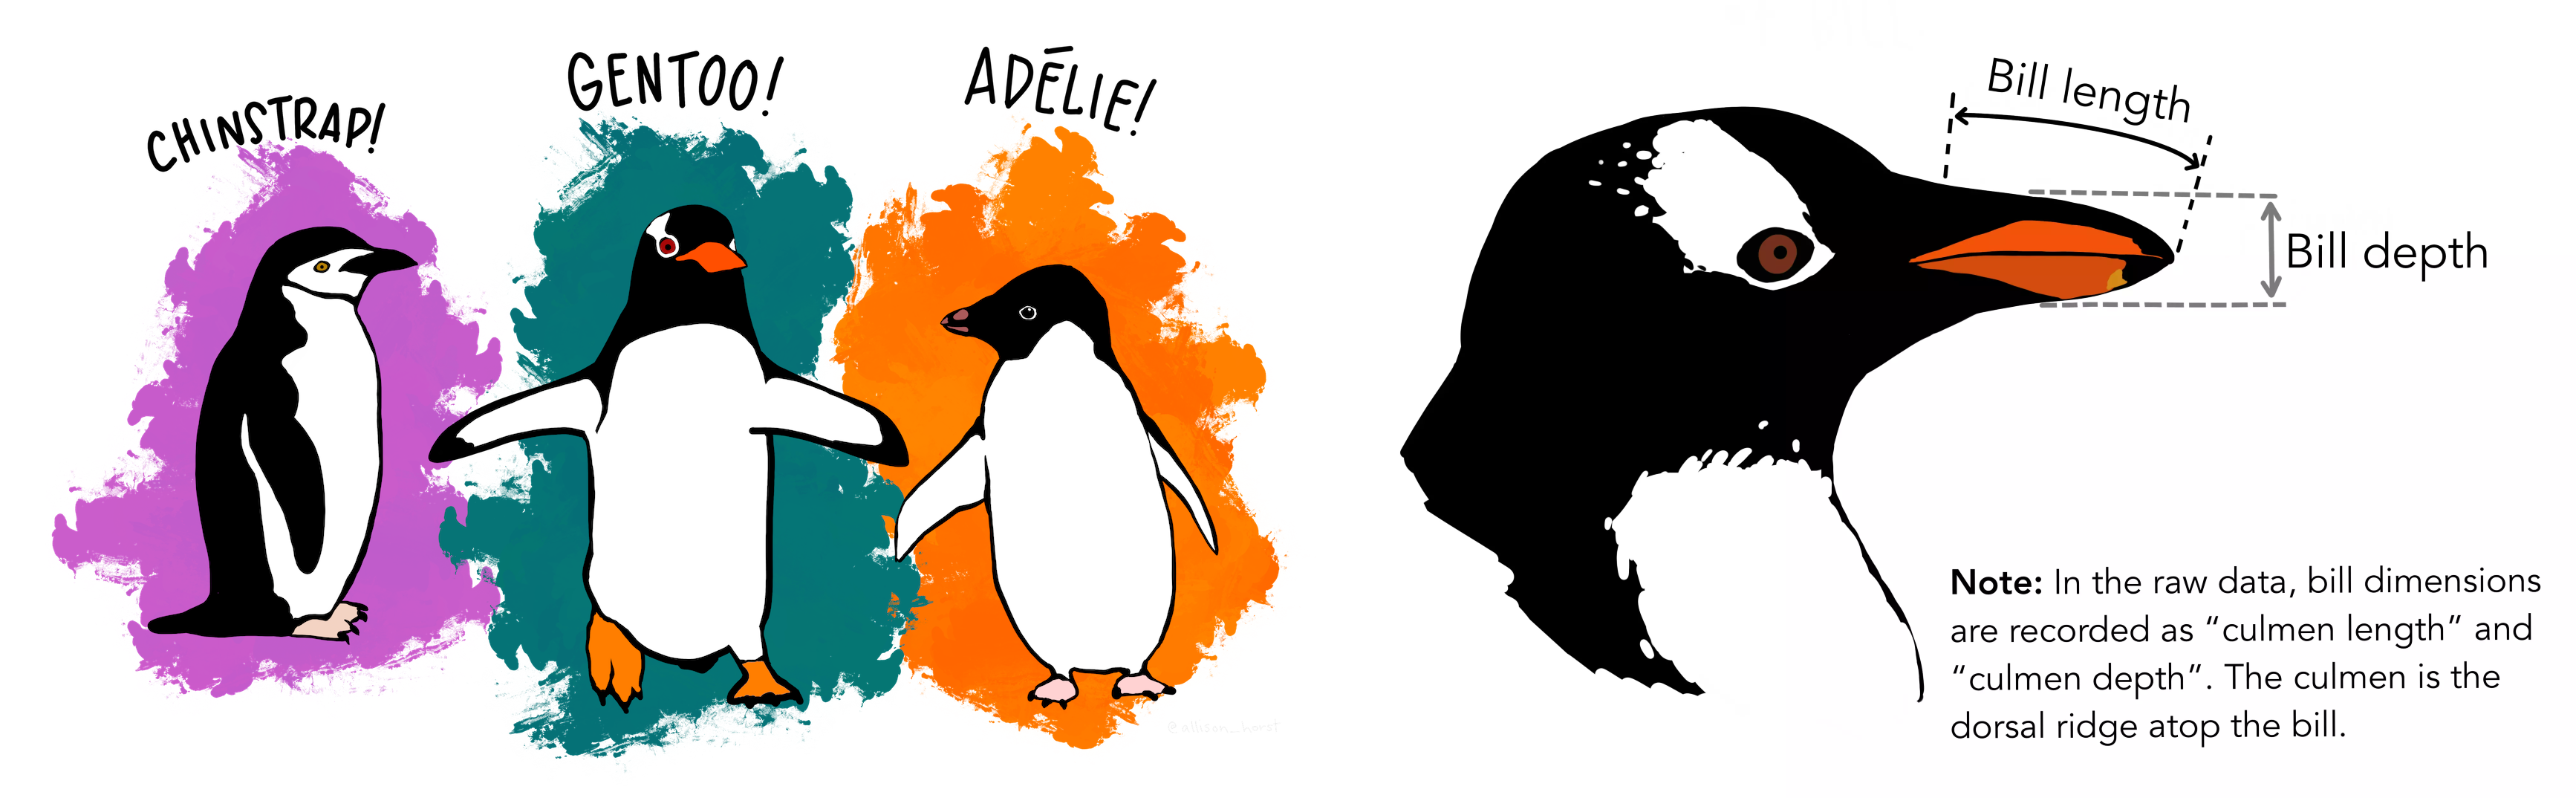


In this notebook, I intend to conduct Exploratory Data Analysis (EDA) on the Palmer Penguins dataset. This will involve generating informative visualizations through graphs to gain insights into the data's patterns and characteristics. Subsequently, I will delve into predictive modeling, utilizing the knowledge gleaned from the EDA phase to develop accurate models for forecasting and analysis. The Palmer Penguins dataset is a well-known collection of penguin measurements, encompassing various species and features, making it a valuable resource for scientific inquiry and data-driven exploration.

**Data comes from:**
https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv

About the data
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

*Atributes*:
Numeric

*species*: the penguin species (Adelie, Chinstrap or Gento)

*island*: isla en la Antártida donde se observó cada pingüino (Biscoe, Torgersen or Dream)

*bill_length_mm*: bill length measurement in millimeters

*bill_depth_mm*: bill depth measurement in millimeters

*flipper_length_mm*: flipper length measurement in millimeters

*body_mass_g*: penguin body weight measurement

*sex*: (female or male)

*year*: year of study

## Content Overview in Colab Notebook

In this Colab notebook, I will cover the following topics:

### 1. Exploratory Data Analysis:
- Data Cleaning
- Utilizing Graphs for Data Visualization (Histograms, Violin Plots, Scatter Plots)
- Statistical Analysis of Numerical Data
- Analyzing Categorical Proportions
- Bivariate Analysis
- Visualizing Penguin Features
- Examining Penguin Distribution
- Investigating Island Distributions
- Exploring Variable Correlations

### 2. Predictive Modeling:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Evaluation Using Confusion Matrix

# Exploratory Data Analysis (EDA):
Exploratory Data Analysis involves summarizing and visualizing the main characteristics of a dataset to gain insights and identify patterns. In this case, with the Palmer Penguins dataset, I'll start by loading the dataset into the notebook. The dataset contains information about different species of penguins, including features like species, island, bill dimensions, flipper length, and body mass. Common tasks during EDA include checking for missing values, data types, basic summary statistics, and identifying potential outliers.

In [ ]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Installing ConfigParser
!pip install ConfigParser

In [ ]:
# Installing pyjanitor
!pip install pyjanitor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

In [ ]:
# Installing the dataset
!pip install palmerpenguins

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import the dataset
from palmerpenguins import load_penguins

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Loading the data
penguins = load_penguins()
penguins.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [ ]:
len(penguins)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


344

In [ ]:
# Check the species of penguins
penguins['species'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

The dataset comprises 344 variations of penguins, which can be categorized into three distinct species. These species are characterized by their unique traits and features, making this dataset an interesting and valuable resource for studying penguin diversity and evolutionary patterns.
* Adelie
* Gentoo
* Chinstrap

In [ ]:
# Where are the penguins from?
penguins['island'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

There are 3 islands from where the penguins are from:
* Biscoe
* Dream
* Torgersen

In [ ]:
# Set the color palette
%matplotlib inline
sns.set_style(style="whitegrid")
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(11,9.4)

# Create a dictionary and color the labels with seaborn
penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8',
    'Biscoe': '#94e2c3',
    'Dream': '#345469',
    'female': 'pink',
    'male': 'skyblue',
}

# Matplotlib
pcolors = ['#ff6602ff','#0f7175ff','#c65dc9ff']
icolors = ['#955FC8', '#94e2c3', '#345469']
scolors = ['#FFC0CB', '#87CEEB',]

plt_colors=[pcolors,icolors,scolors]

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Variable from the dataset**
1. species = categorical
2. island = categorical
3. bill_length_mm = numerical
4. flipper_lenth_mm = numerical
5. body_mass_g = numerical
6. sex = categorical
7. year = numerical



In [ ]:
penguins.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(344, 8)

Shape of the dataset
* rows = **344**
* cols = **7**

In [ ]:
category_columns = ['species', 'island', 'sex']
numerical_columns = penguins.select_dtypes(include=np.number).columns
penguin_columns = ['Adelie', 'Gentoo', 'Chinstrap']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Cleaning

In [ ]:
penguins.notnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [ ]:
# Find missing values
penguins.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
# Proportion of missing values
penguins.isnull().sum() / penguins.notnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


species              0.000000
island               0.000000
bill_length_mm       0.005848
bill_depth_mm        0.005848
flipper_length_mm    0.005848
body_mass_g          0.005848
sex                  0.033033
year                 0.000000
dtype: float64

In [ ]:
# Missing values
missing_data = penguins.isnull().any(True)
missing_data
penguins[missing_data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  year  
3            NaN  NaN  2007  
8         3475.0  NaN  2007  
9         4250.0  NaN  2007  
10        3300.0  NaN  2007  
11        3700.0  NaN  2007  
47        2975.0  NaN  2007  
178       4100.0  NaN  2007  
218       4650.0  NaN  2008  
256       4725.0  NaN  2009  
268       4875.0  NaN  2009  
271          NaN  NaN  2009

In [ ]:
# Getting rid of the missing values
penguins = penguins.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Converting the data type
penguins= penguins.astype({'species':'category', 'island':'category', 'sex':'category',})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 17.0 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Performing statistics on numerical data


In [ ]:
# Numerical data
numerical = pd.concat([
    penguins.describe(include=np.number).iloc[0:1],
    penguins.mode(numeric_only=True).rename(index={0:'mode'}),
    pd.DataFrame(penguins.median(numeric_only=True),columns=['median']).T,
    penguins.describe(include=np.number).iloc[1:8],
])
numerical

NameError: ignored

In [ ]:
penguins.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

## Creating Visualizations using Graphs:
Visualizations are crucial for understanding data and communicating insights effectively. I will use various Python libraries such as Matplotlib, Seaborn, or Plotly to create different types of graphs and plots. Some common visualizations for this dataset might include scatter plots to explore relationships between numerical variables, bar plots to compare categorical variables, histograms for understanding data distributions, and perhaps even a pair plot or heatmap to visualize correlations between multiple variables.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: ignored

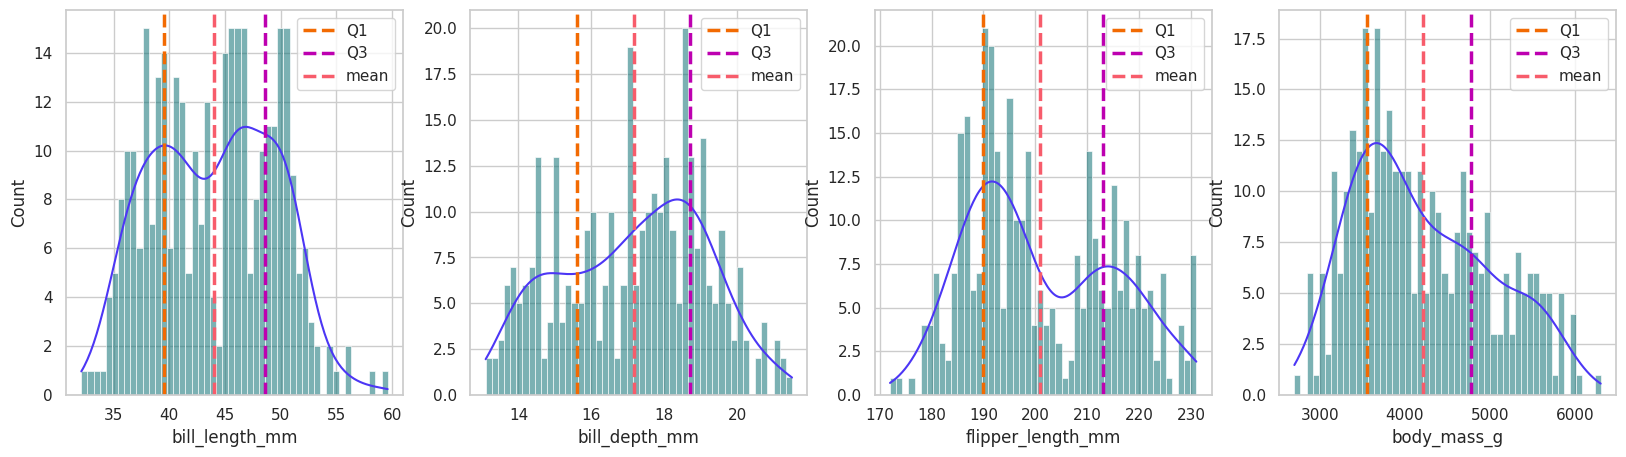

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
for i,col in enumerate(numerical):
    sns.histplot(
        ax=ax[i],
        data=penguins,
        x=col,
        palette=penguin_color,
        bins=50,
        alpha=.55,
        color='#0f7175ff',
        kde=True,
        )
    ax[i].lines[0].set_color('#4c36f5')

    ax[i].axvline(
        x=numerical.iloc[:,i:i+1].loc['25%'][0],
        color='#f26a02',
        linestyle='dashed',
        linewidth=2.5,
        label='Q1'
    )
    ax[i].axvline(
        x=numerical.iloc[:,i:i+1].loc['75%'][0],
        color='#bd00b0',
        linestyle='dashed',
        linewidth=2.5,
        label='Q3'
    )
    ax[i].axvline(
        x=numerical.iloc[:,i:i+1].loc['mean'][0],
        color='#f75c6b',
        linestyle='dashed',
        linewidth=2.5,
        label='mean',
    )
    ax[i].legend()


### Graph deductions
The variables in bill_length_mm, bill_depth_mm, flipper_length_mm tend to be bimodal distribution.

The  body_mass_g tends to be a positively skewed distribution

In [ ]:
# Statistics for categoricla data
penguins.describe(include='category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

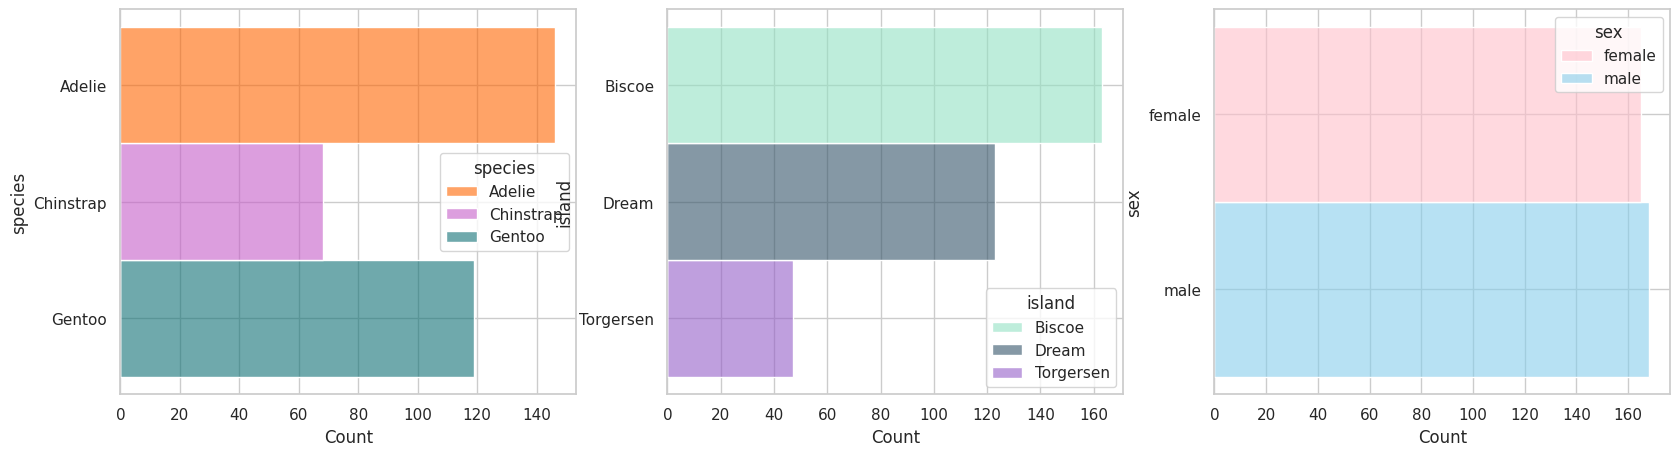

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical variables count visualizations
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, category in enumerate(category_columns):
    sns.histplot(
        ax=ax[i],
        data=penguins,
        y=category,
        hue=category,
        palette=penguin_color,
        alpha=0.6
    )

plt.show()  # Don't forget to display the plot


From the graphs it is evident that only sex is balanced

## Categorical Proportion Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

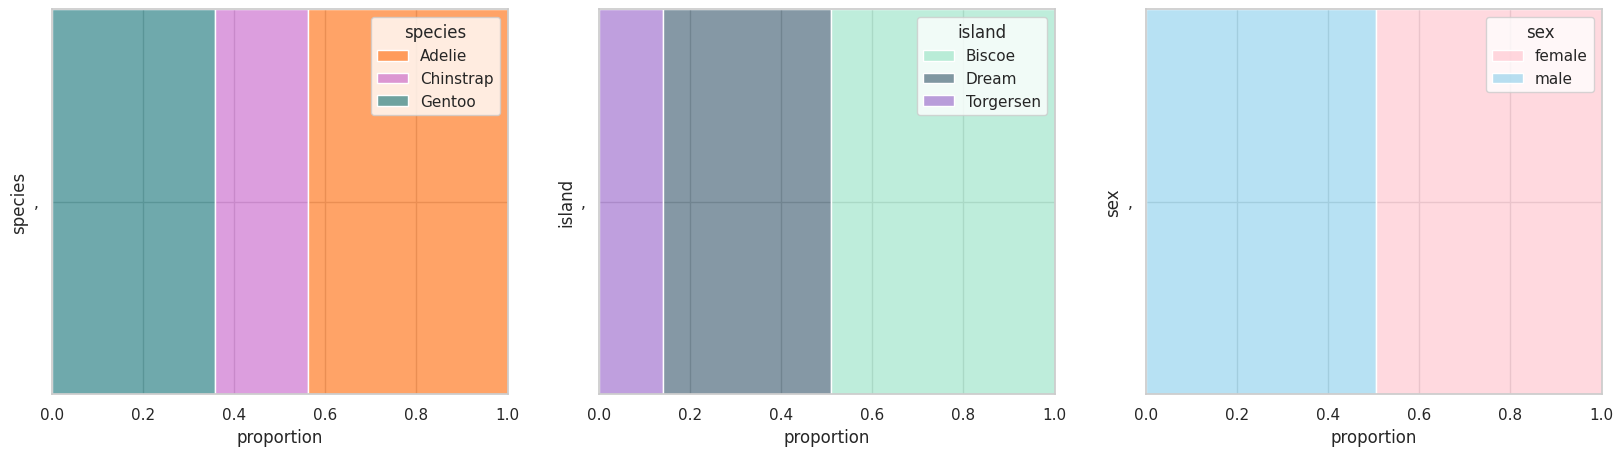

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
for i, category in enumerate(category_columns):
  sns.histplot(
      ax = ax[i],
      data = penguins.add_column(category[i], ',').reset_index(),
      y = category[i],
      palette = penguin_color,
      multiple = 'fill',
      stat = 'count',
      hue = category,
      alpha = 0.6
  )
  ax[i].set(ylabel=category, xlabel = 'proportion')

## Getting the scatter plots


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


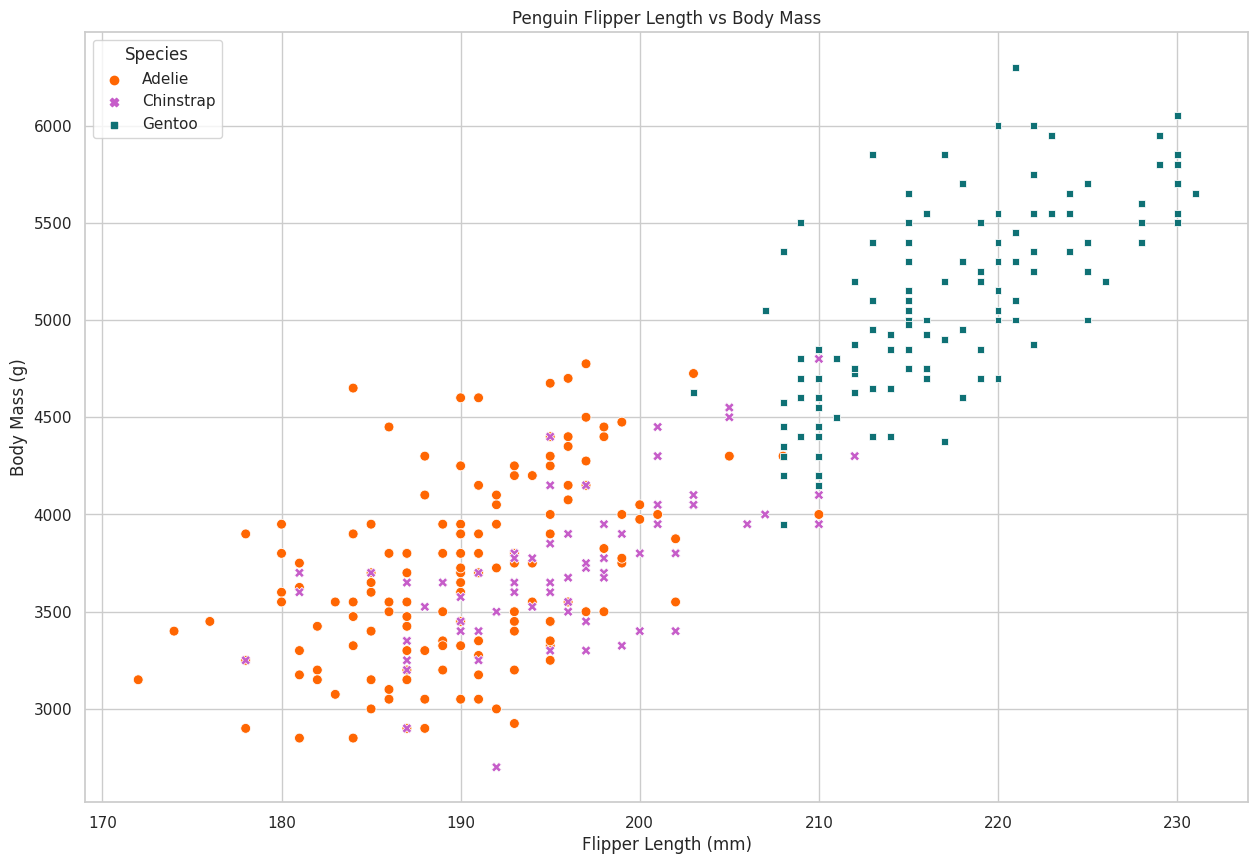

In [ ]:
# Penguin Flipper Vs Body Mass
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'penguins' is your DataFrame containing the dataset

plt.figure(figsize=(15, 10))

sns.scatterplot(data=penguins,
                x='flipper_length_mm',
                y='body_mass_g',
                hue='species',
                style='species',
                s=50,
                palette=penguin_color)

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Flipper Length vs Body Mass')
plt.legend(title='Species')
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


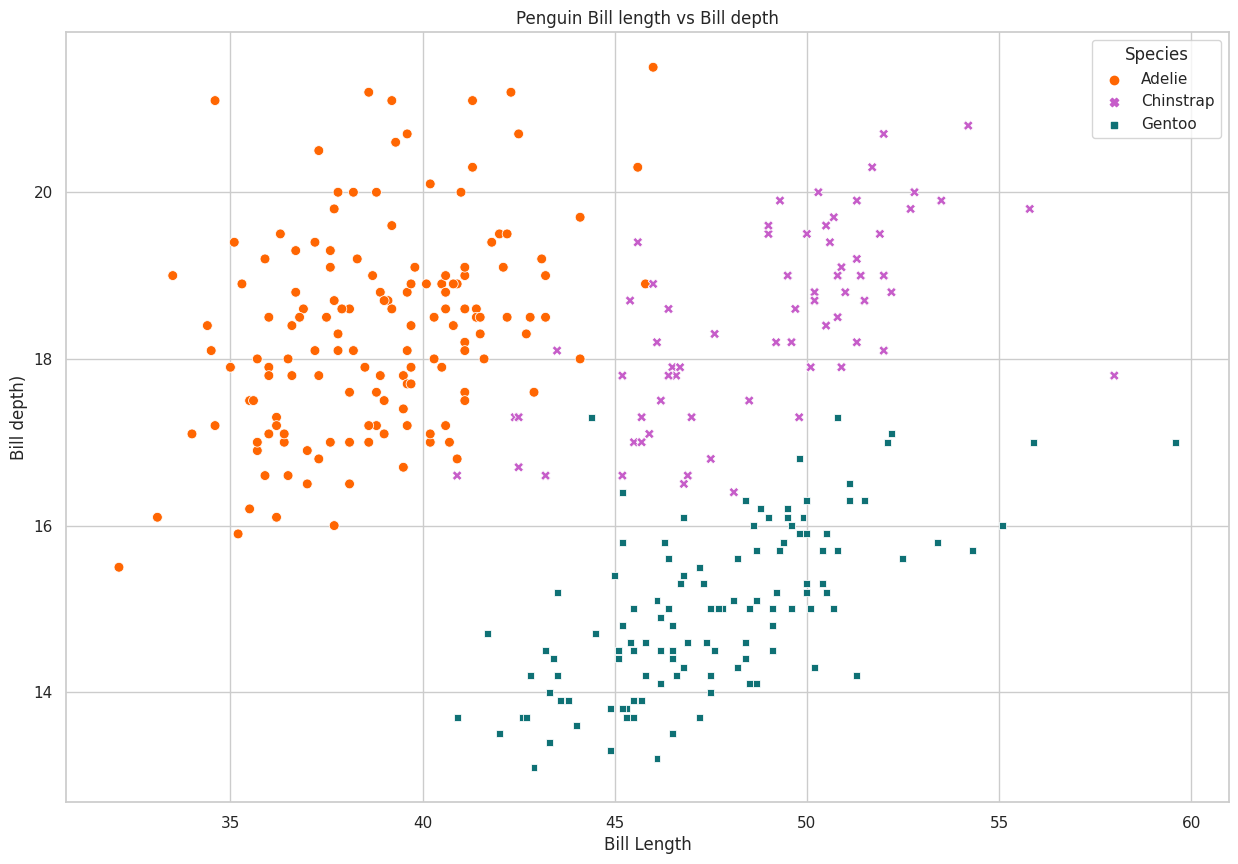

In [ ]:
# Scatterplot Bill-length Vs Bill-depth
plt.figure(figsize=(15, 10))

sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                style='species',
                s=50,
                palette=penguin_color)

plt.xlabel('Bill Length')
plt.ylabel('Bill depth)')
plt.title('Penguin Bill length vs Bill depth')
plt.legend(title='Species')
plt.grid(True)

plt.show()

This is a scatter plot visualization of the summary table above. Culmen length and depth seem to be great indicators of species, as different species are mostly grouped into separate clusters except for a few outliers.

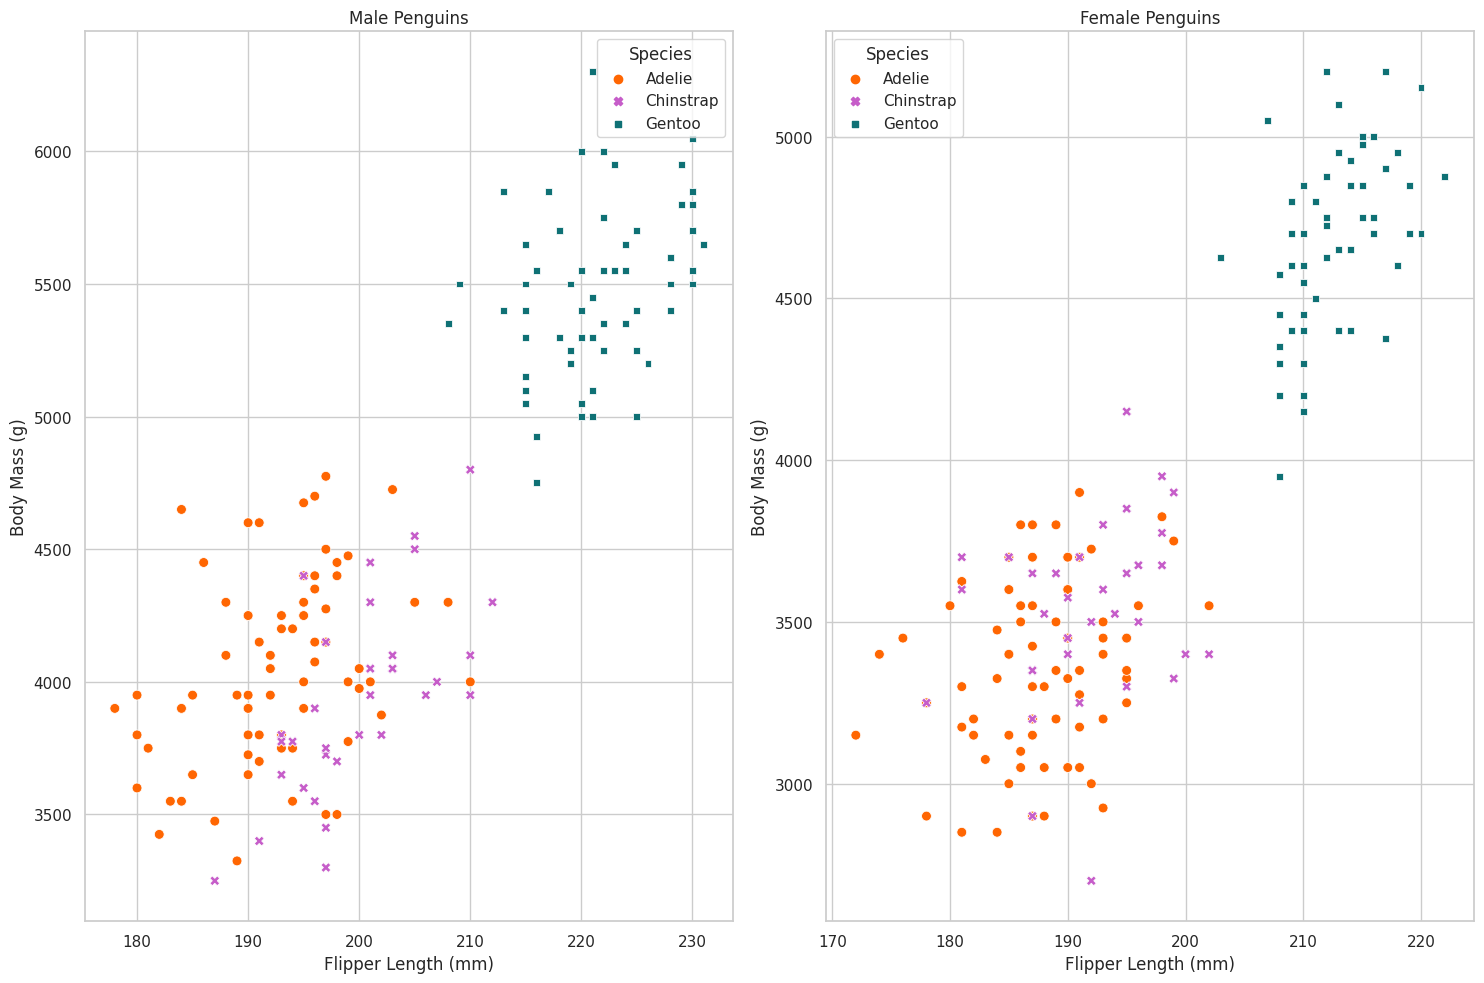

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'penguins' is your DataFrame containing the dataset

plt.figure(figsize=(15, 10))

# Create separate plots for male and female penguins
plt.subplot(1, 2, 1)  # First subplot for males
male_penguins = penguins[penguins['sex'] == 'male']
sns.scatterplot(data=male_penguins,
                x='flipper_length_mm',
                y='body_mass_g',
                hue='species',
                style='species',
                s=50,
                palette=penguin_color)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Male Penguins')
plt.legend(title='Species')
plt.grid(True)

plt.subplot(1, 2, 2)  # Second subplot for females
female_penguins = penguins[penguins['sex'] == 'female']
sns.scatterplot(data=female_penguins,
                x='flipper_length_mm',
                y='body_mass_g',
                hue='species',
                style='species',
                s=50,
                palette=penguin_color)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Female Penguins')
plt.legend(title='Species')
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


**Discussion**

When the dataset was divided by sex, the scatterplot shows more separation between species, thus better classification.





In [ ]:
# Can I get ratios?
# Store unique species and sex
species = penguins['species'].unique()
sex = penguins['sex'].unique()

# Create a list of penguin and sex combinations
penguin_col = [penguin + ", " + s for penguin in species for s in sex]

# Create a list of bill length to bill depth ratios
ratio_col = [penguins[(penguins['species'] == p) & (penguins['sex'] == s)]['bill_length_mm'].mean() /
             penguins[(penguins['species'] == p) & (penguins['sex'] == s)]['bill_depth_mm'].mean()
             for p in species for s in sex]

# Create a pandas DataFrame
len_dep_ratios = pd.DataFrame({"Penguin": penguin_col, "Length : Depth Ratios": ratio_col})

# Display the DataFrame
print(len_dep_ratios)


             Penguin  Length : Depth Ratios
0       Adelie, male               2.117719
1     Adelie, female               2.114272
2       Gentoo, male               3.147580
3     Gentoo, female               3.200170
4    Chinstrap, male               2.653834
5  Chinstrap, female               2.647993


 **Discussion of length:depth ratio**

 See that all penguin species have quite distinct length : depth ratios from each other. The ratios are also very similar between different sex of the same species. As a result, length : depth ratio could be a useful criteria for classification between species. In this case, grouping further by sex will not be helpful much.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


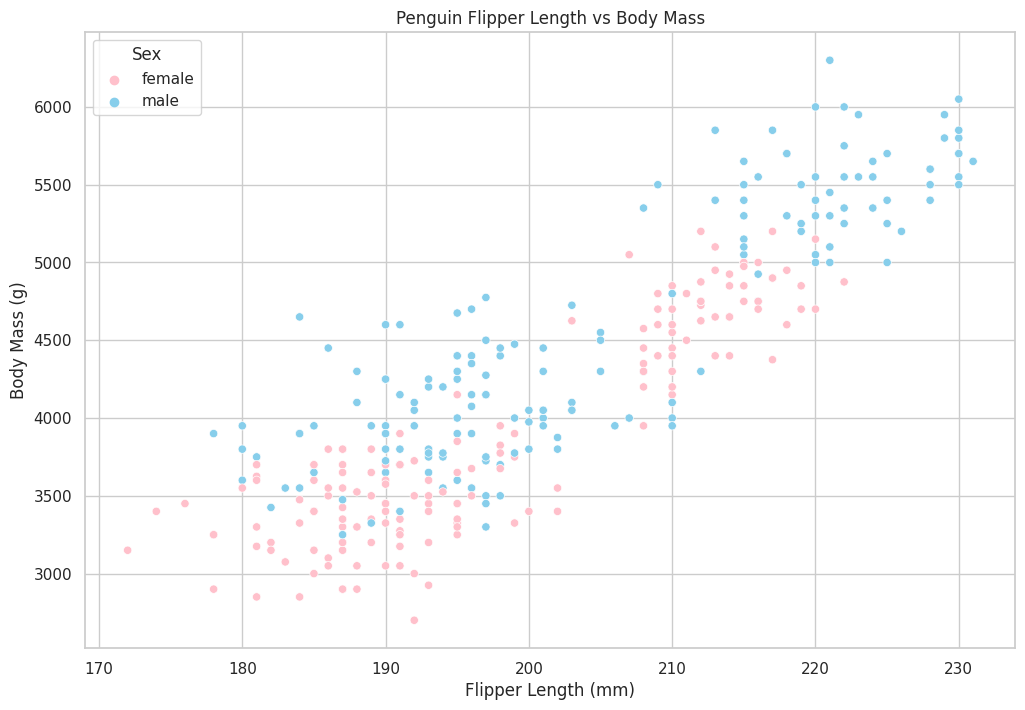

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'penguins' is your DataFrame containing the dataset

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatterplot with points colored by sex
scatterplot = sns.scatterplot(data=penguins,
                              x='flipper_length_mm',
                              y='body_mass_g',
                              hue='sex',
                              palette=penguin_color)

# Set the labels for x and y axes
scatterplot.set(xlabel='Flipper Length (mm)', ylabel='Body Mass (g)')

# Set the title of the plot
scatterplot.set_title('Penguin Flipper Length vs Body Mass')

# Add a legend with a title
plt.legend(title='Sex')

# Display grid lines
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007

## Getting the scatterplots by Islands

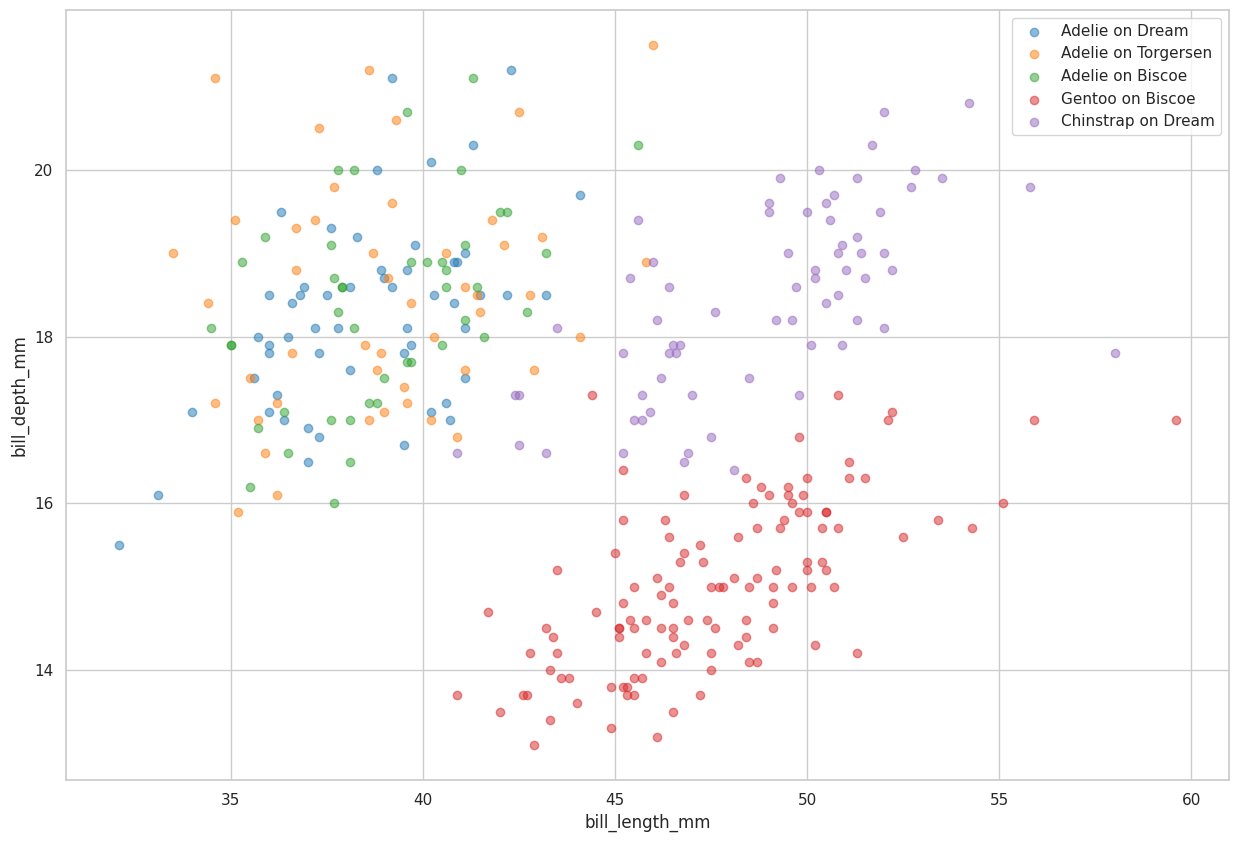

In [ ]:
#Create figure
fig, ax = plt.subplots(1, figsize = (15, 10))

#Set xlabel and ylabel
ax.set(xlabel = "bill_length_mm",
       ylabel = "bill_depth_mm")

#Store island locations (Dream, Biscoe, Torgersen)
locations = set(penguins["island"])

#Loop through species and locations
for penguin in species:
    for loc in locations:
        #Create subset of penguins data frame dependent on current penguin and loc
        sub = penguins[(penguins["species"] == penguin) & (penguins["island"] == loc)]

        #If there does not exist any penguin on loc, continue through next iteration
        if sub.empty: continue

        #Scatterplot of Culmen Depth vs. Culmen Length grouped by species and island
        ax.scatter(sub["bill_length_mm"],
                   sub["bill_depth_mm"],
                   label = penguin + " on " + loc,
                   alpha = 0.5)

#Display legend
ax.legend()

**Discussing plot**

In the depicted scatter plot, we delve into the interplay between Bill Length (mm) and Bill Depth (mm), while taking into account both the classifications of Species and Island. This visualization unveils distinct clusters: *Adelie* penguins showcase elevated Bill Depth and diminished Bill Length; *Gentoo* penguins feature modest Bill Depth alongside extended Bill Length; while *Chinstrap* penguins present a combination of amplified Bill Depth and Bill Length. The partitioning of data by Island adds another layer of insight: *Biscoe Island* exclusively hosts *Gentoo* penguins, *Dream Island* is predominantly inhabited by *Chinstrap* penguins, and *Adelie* penguins exhibit a presence spanning *Torgersen*, *Dream*, and *Biscoe* Islands.

A particularly noteworthy observation emerges—*Adelie* penguins consistently exhibit heightened Bill Depth and reduced Bill Length, irrespective of their island habitat. This finding implies that the influence of Island on species classification is secondary to the significance of the Bill Depth to Bill Length ratio. Consequently, this scatter plot reaffirms the inference that these physiological attributes, Bill Depth and Bill Length, play a substantial role in predicting penguin species. This discovery underscores their pivotal relevance in subsequent modeling endeavors.

In [ ]:
import pandas as pd


# Calculate value counts
island_counts = penguins['island'].value_counts()
sex_counts = penguins['sex'].value_counts()
species_counts = penguins['species'].value_counts()

# Calculate total number of penguins
total_penguins = 333

# Calculate percentage distributions
island_percentages = (island_counts / total_penguins) * 100
sex_percentages = (sex_counts / total_penguins) * 100
species_percentages = (species_counts / total_penguins) * 100

# Create DataFrames for percentage distributions
island_df = pd.DataFrame({'Island': island_percentages.index, 'Island_Percentage': island_percentages.values})
sex_df = pd.DataFrame({'Sex': sex_percentages.index, 'Sex_Percentage': sex_percentages.values})
species_df = pd.DataFrame({'Species': species_percentages.index, 'Species_Percentage': species_percentages.values})

# Format percentages with % sign and 2 decimal places
island_df['Island_Percentage'] = island_df['Island_Percentage'].apply(lambda x: '{:.2f}%'.format(x))
sex_df['Sex_Percentage'] = sex_df['Sex_Percentage'].apply(lambda x: '{:.2f}%'.format(x))
species_df['Species_Percentage'] = species_df['Species_Percentage'].apply(lambda x: '{:.2f}%'.format(x))

# Display DataFrames
print("Island Percentage Distribution:")
print(island_df)
print("\nSex Percentage Distribution:")
print(sex_df)
print("\nSpecies Percentage Distribution:")
print(species_df)


Island Percentage Distribution:
      Island Island_Percentage
0     Biscoe            48.95%
1      Dream            36.94%
2  Torgersen            14.11%

Sex Percentage Distribution:
      Sex Sex_Percentage
0    male         50.45%
1  female         49.55%

Species Percentage Distribution:
     Species Species_Percentage
0     Adelie             43.84%
1     Gentoo             35.74%
2  Chinstrap             20.42%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Graphs readings
From the graphs, the species of Adelie is about 43%, Gentoo 35% and Chinstrap 20%. The sex of the penguins is slightly equally distributed. It is clear that a majority of penguins are from Biscoe with 48% of the distribution

## Bivariate Analysis

In [ ]:
# Create filter for analysis
male = penguins.sex == 'Male'
female = ~male

adelie = penguins.species == 'Adelie'
chinstrap = penguins.species == 'Chinstrap'
gentoo = penguins.species == 'Gentoo'

torgersen = penguins.island == 'Torgersen'
dream = penguins.island == 'Dream'
biscoe = penguins.island == 'Biscoe'

species = [adelie,chinstrap,gentoo]
islands = [torgersen,dream,biscoe]
sex = [male, female]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Analysis of penguin features
penguins.groupby(['species', 'island']).agg(['min', 'mean', 'max']).dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


bill_length_mm                  bill_depth_mm             \
                               min       mean   max           min       mean   
species   island                                                               
Adelie    Biscoe              34.5  38.975000  45.6          16.0  18.370455   
          Dream               32.1  38.520000  44.1          15.5  18.240000   
          Torgersen           33.5  39.038298  46.0          15.9  18.451064   
Chinstrap Dream               40.9  48.833824  58.0          16.4  18.420588   
Gentoo    Biscoe              40.9  47.568067  59.6          13.1  14.996639   

                          flipper_length_mm                    body_mass_g  \
                      max               min        mean    max         min   
species   island                                                             
Adelie    Biscoe     21.1             172.0  188.795455  203.0      2850.0   
          Dream      21.2             178.0  189.927273  208.0      2900.0   
          Torgersen  21.5             176.0  191.531915  210.0      2900.0   
Chinstrap Dream      20.8             178.0  195.823529  212.0      2700.0   
Gentoo    Biscoe     17.3             203.0  217.235294  231.0      3950.0   

                                            year                       
                            mean     max     min         mean     max  
species   island                                                       
Adelie    Biscoe     3709.659091  4775.0  2007.0  2008.136364  2009.0  
          Dream      3701.363636  4650.0  2007.0  2008.018182  2009.0  
          Torgersen  3708.510638  4700.0  2007.0  2008.021277  2009.0  
Chinstrap Dream      3733.088235  4800.0  2007.0  2007.970588  2009.0  
Gentoo    Biscoe     5092.436975  6300.0  2007.0  2008.067227  2009.0

In [ ]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Analysis of penguin features
penguins.groupby(['species', 'island']).agg(['min', 'mean', 'max']).dropna()

bill_length_mm                  bill_depth_mm             \
                               min       mean   max           min       mean   
species   island                                                               
Adelie    Biscoe              34.5  38.975000  45.6          16.0  18.370455   
          Dream               32.1  38.520000  44.1          15.5  18.240000   
          Torgersen           33.5  39.038298  46.0          15.9  18.451064   
Chinstrap Dream               40.9  48.833824  58.0          16.4  18.420588   
Gentoo    Biscoe              40.9  47.568067  59.6          13.1  14.996639   

                          flipper_length_mm                    body_mass_g  \
                      max               min        mean    max         min   
species   island                                                             
Adelie    Biscoe     21.1             172.0  188.795455  203.0      2850.0   
          Dream      21.2             178.0  189.927273  208.0      2900.0   
          Torgersen  21.5             176.0  191.531915  210.0      2900.0   
Chinstrap Dream      20.8             178.0  195.823529  212.0      2700.0   
Gentoo    Biscoe     17.3             203.0  217.235294  231.0      3950.0   

                                            year                       
                            mean     max     min         mean     max  
species   island                                                       
Adelie    Biscoe     3709.659091  4775.0  2007.0  2008.136364  2009.0  
          Dream      3701.363636  4650.0  2007.0  2008.018182  2009.0  
          Torgersen  3708.510638  4700.0  2007.0  2008.021277  2009.0  
Chinstrap Dream      3733.088235  4800.0  2007.0  2007.970588  2009.0  
Gentoo    Biscoe     5092.436975  6300.0  2007.0  2008.067227  2009.0

## Penguin feature visualizations

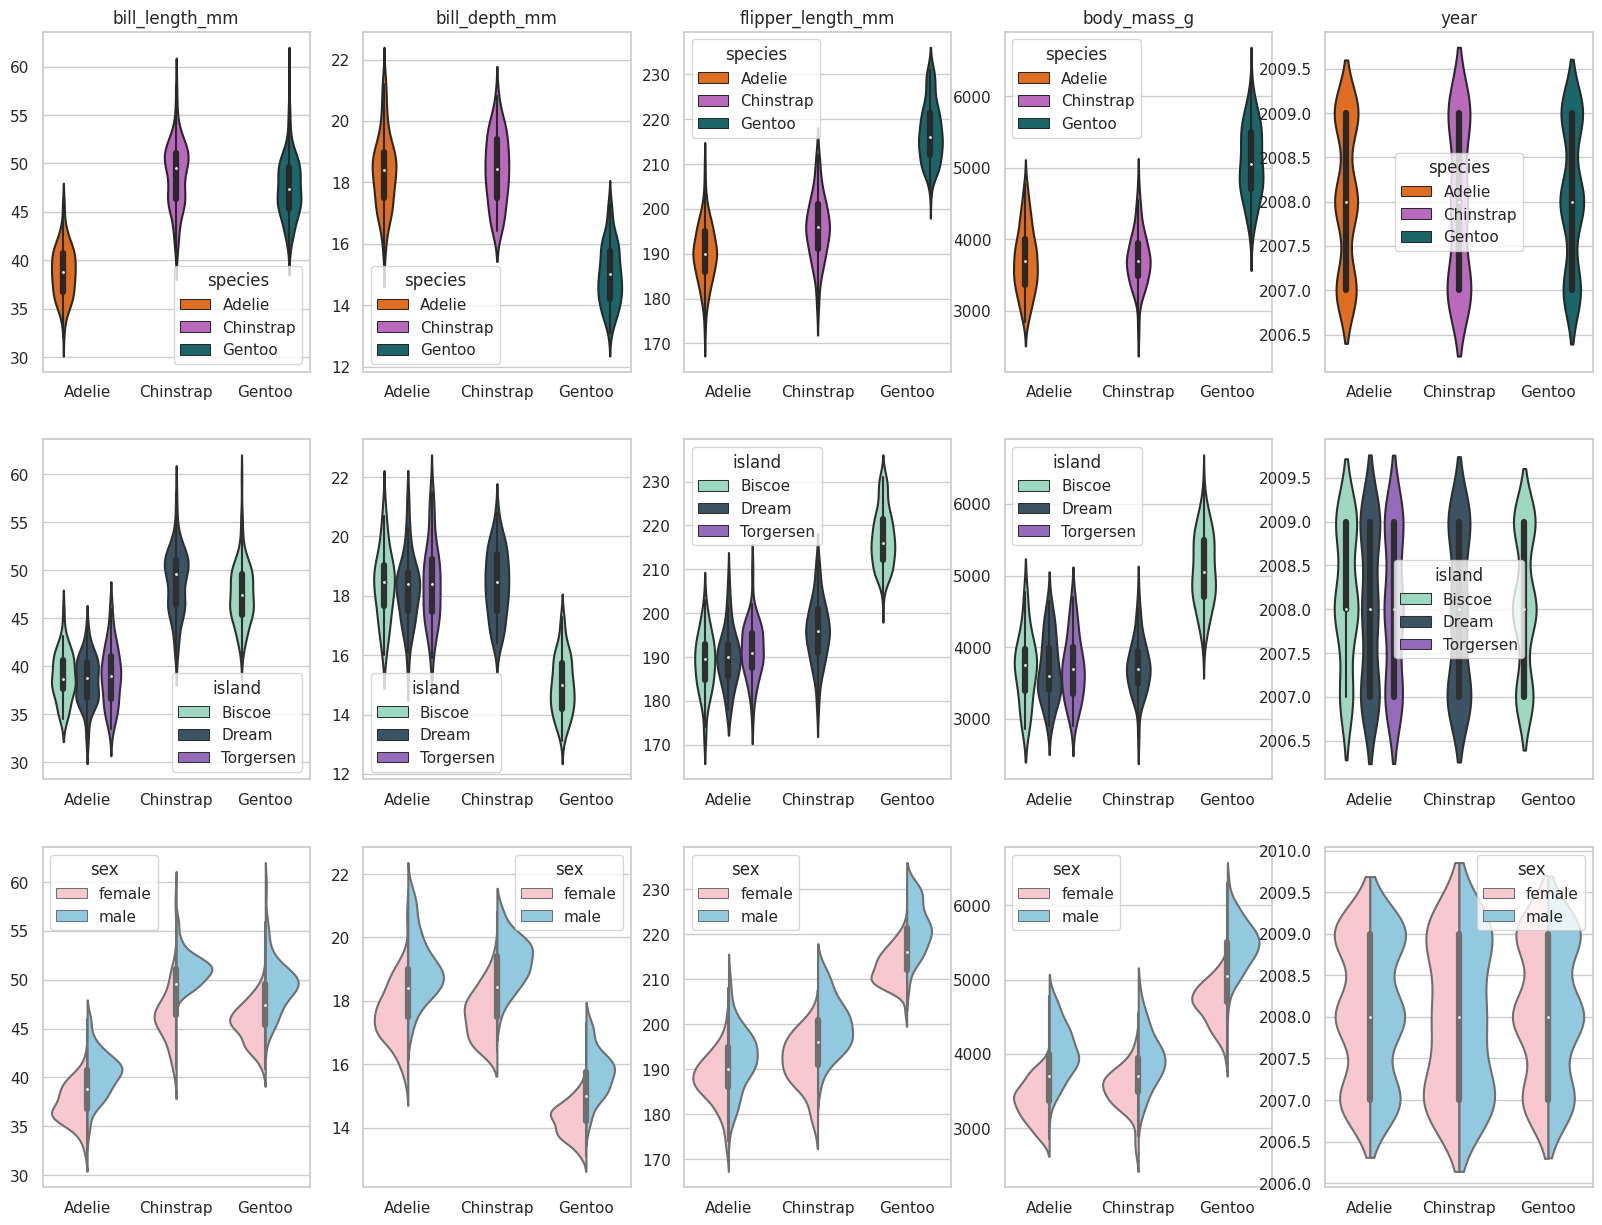

In [ ]:
# Make visualizations using violinplots
fig, ax = plt.subplots(3, len(numerical_columns), figsize=(20,15))
for i, i_col in enumerate(category_columns):
  for j, j_col in enumerate(numerical_columns):
    sns.violinplot(
        split = True if i == 2 else False,
        ax = ax[i][j],
        data = penguins,
        x = 'species',
        y = j_col,
        hue = i_col,
        palette = penguin_color
    )
    ax[i][j].set_title(j_col) if i == 0 else None
    ax[i][j].set_xlabel(None)
    ax[i][j].set_ylabel(None)


# Conclusions:
**Adelie penguins:**
1. They are present on all three islands.
2. Adelies are smaller than the Chinstrap and Gentoo species. Except for the depth of its bill.
3. Its flipper and bill, both long and wide, are longer on Torgersen Island than its species
4. They tend to be heavier on Biscoe Island.

**Chinstrap penguins:**
1. Its only found on Dream Island.
2. Chinstrap penguins have longer wings and are heavier than Adelie penguins but less than the Gentoo penguins.
3. The length of its bill is similar to the Adelie penguin, but it is wider than the Gentoo penguin.

**Gentoo penguins:**
1. Its only located on Biscoe Island.
2. They are heaviest than the other species.
3. They have longer flippers than the other species.
4. Gentoo penguins have the longest bill and the thinnest at the same time

In all species, males were bigger than females. But it was discovered a female chinstrap penguin had longer flippers than other males from the same species.

# Analysis of Penguin distribution

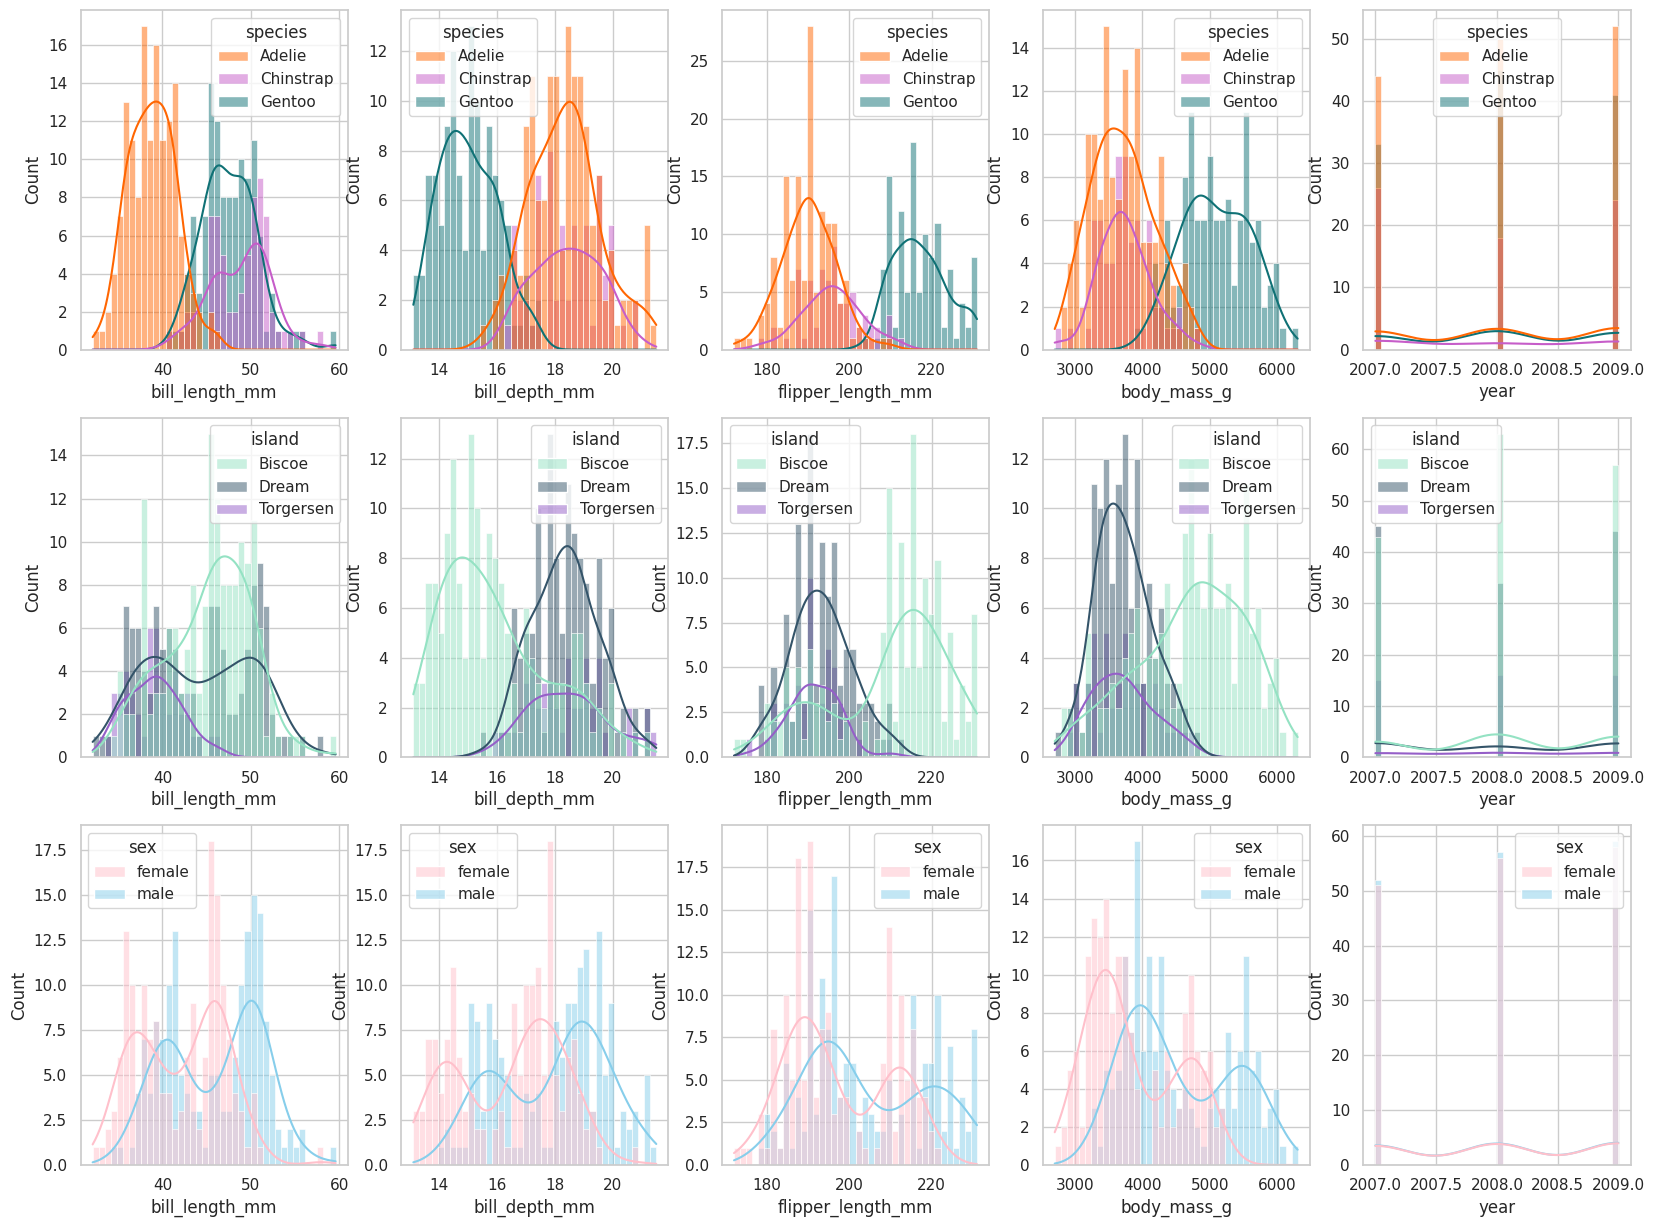

In [ ]:
# General distribution
fig,ax = plt.subplots(3,len(numerical_columns), figsize=(20,15))

for i, i_col in enumerate(category_columns):
    for j, j_col in enumerate(numerical_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins,
            x=j_col,
            hue=i_col,
            bins=40,
            kde=True,
            palette=penguin_color,
            )

##Partial Conclusions
With the last graph, we can conclude that:

1. The species category is the one that most closely corresponds to a normal distribution.
2. Biscoe Island has a bimodal trend.
3. Dream Island appears to follow a normal distribution except for the variable bill length, which tends to have a bimodal distribution.
4. Torgersen Island tends to have a normal distribution.
5. The sex of penguins has a bimodal tendency.


**Data insights**

Biases in the species category may arise from the difference in values between sexes of the same species.
Bimodal trends in the island category may be suggesting the presence of more than one penguin per island.
Bimodal tendencies in sex are due to different species.

# Plot the individual distributions for the species

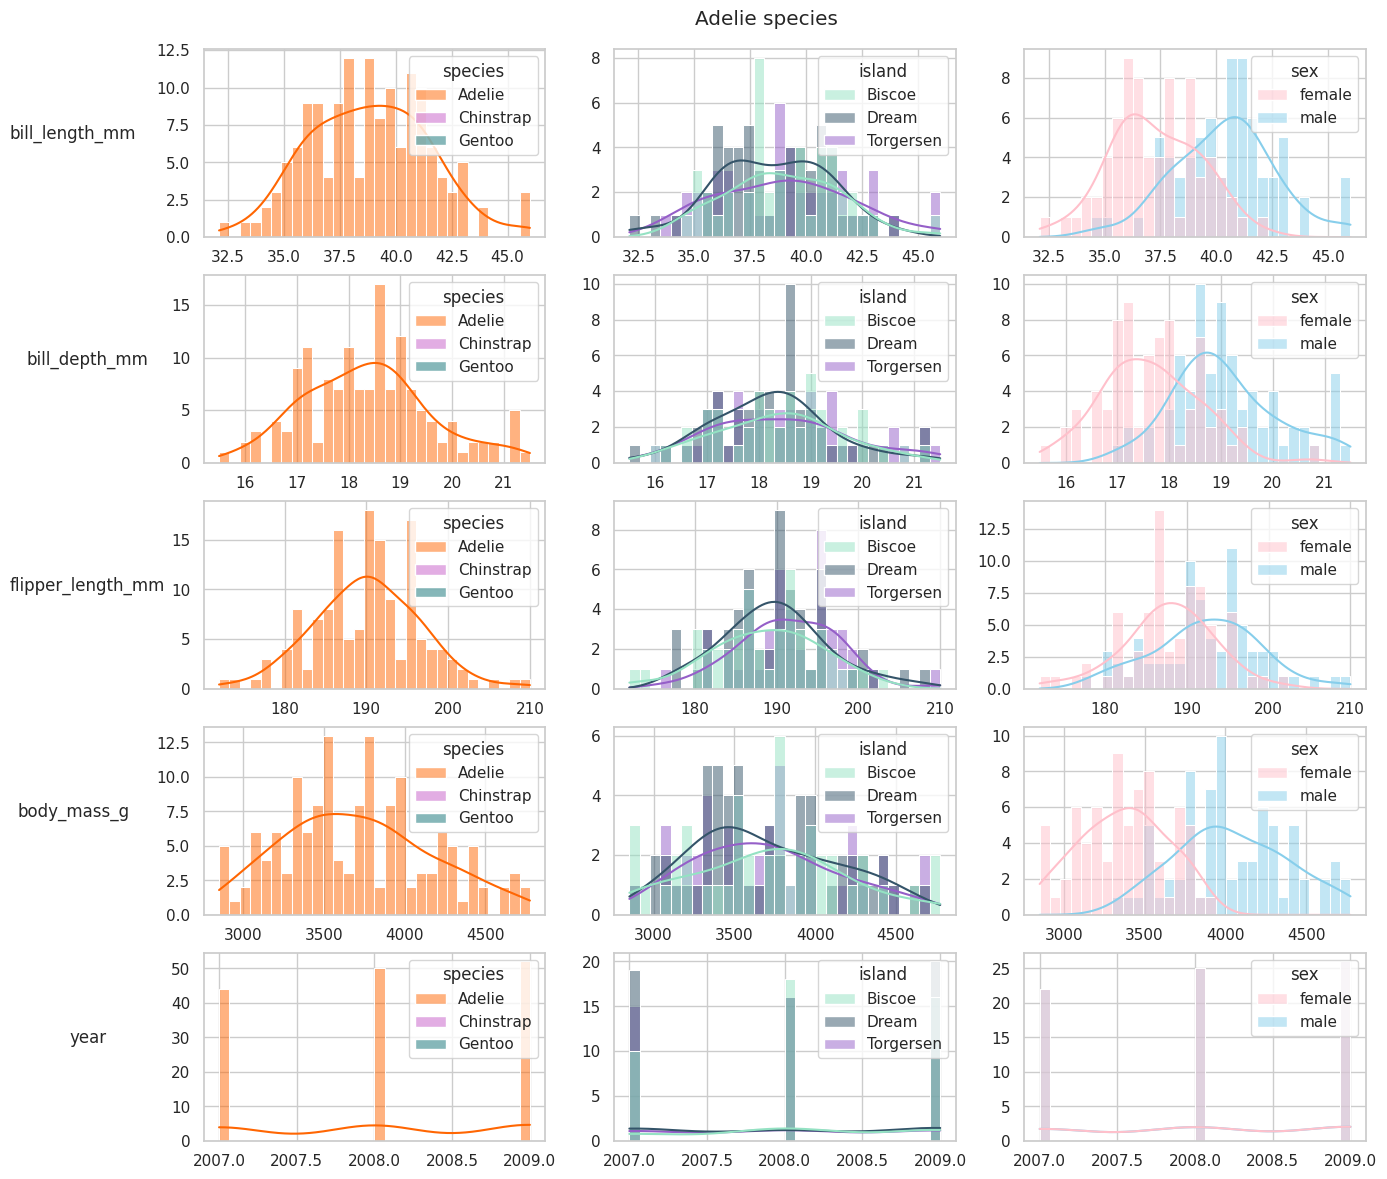

In [ ]:
# Plot Adelie species distributions
fig,ax = plt.subplots(len(numerical_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numerical_columns):
    for j, j_col in enumerate(category_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins[adelie],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )

        ax[i][j].set_ylabel(numerical_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

fig.suptitle('Adelie species');
plt.subplots_adjust(top=0.95);

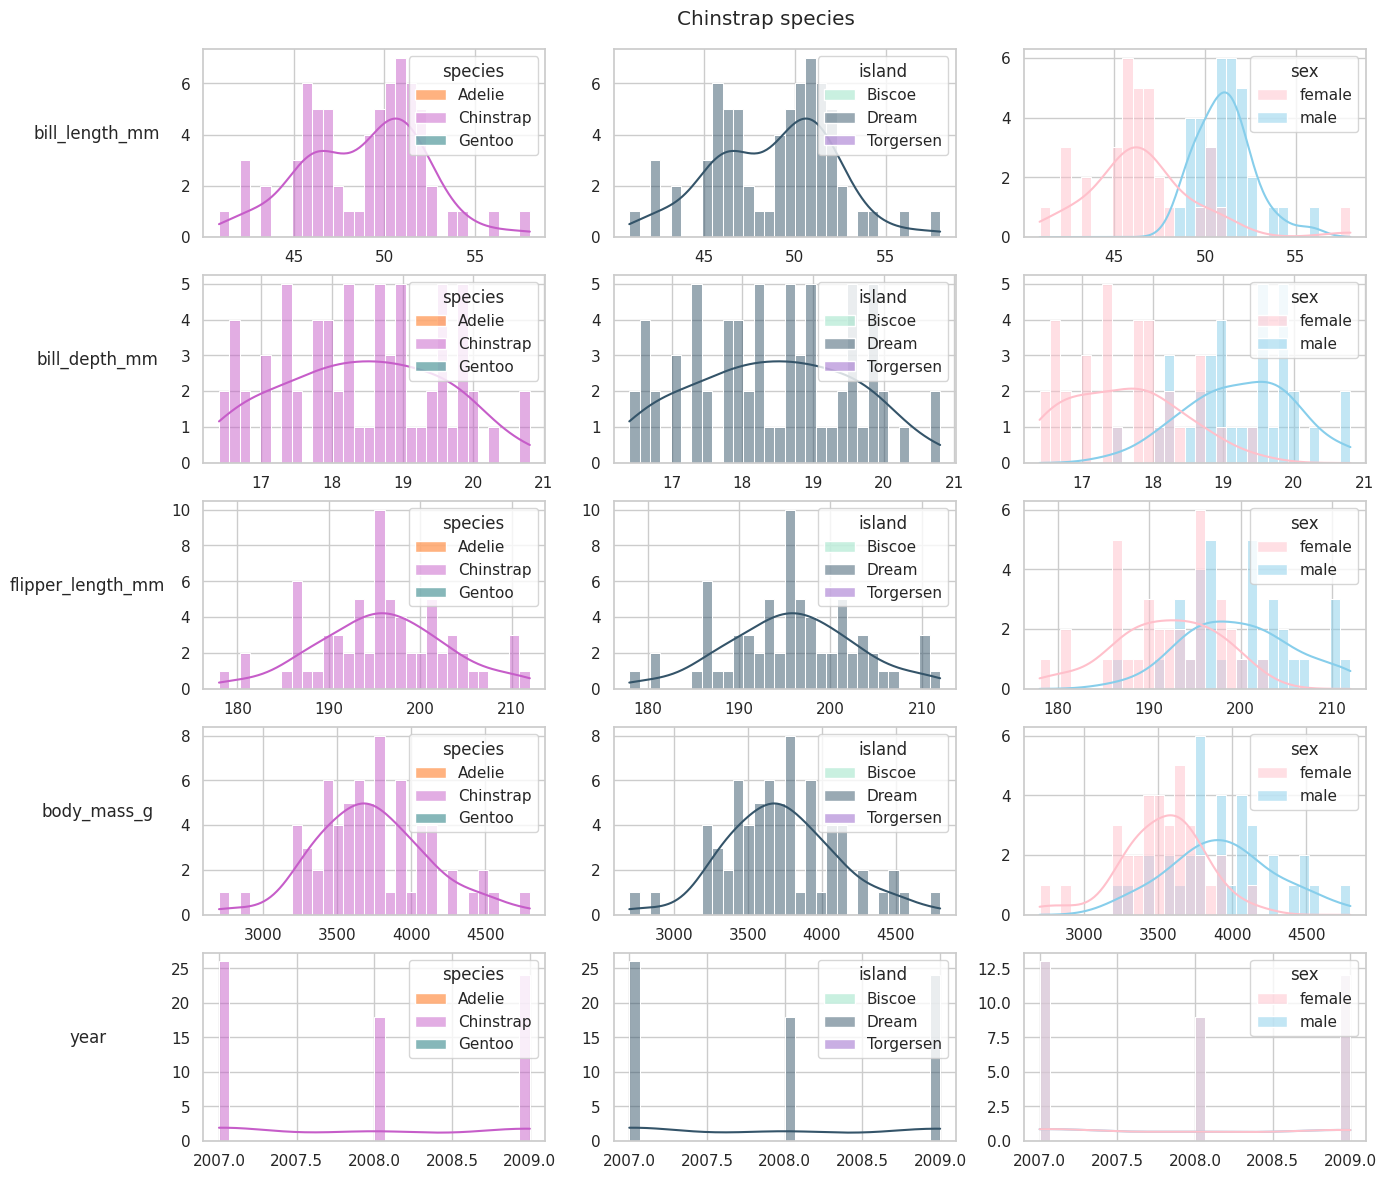

In [ ]:
# Plot Chinstrap distributions
fig,ax = plt.subplots(len(numerical_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numerical_columns):
    for j, j_col in enumerate(category_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins[chinstrap],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )

        ax[i][j].set_ylabel(numerical_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

fig.suptitle('Chinstrap species');
plt.subplots_adjust(top=0.95);

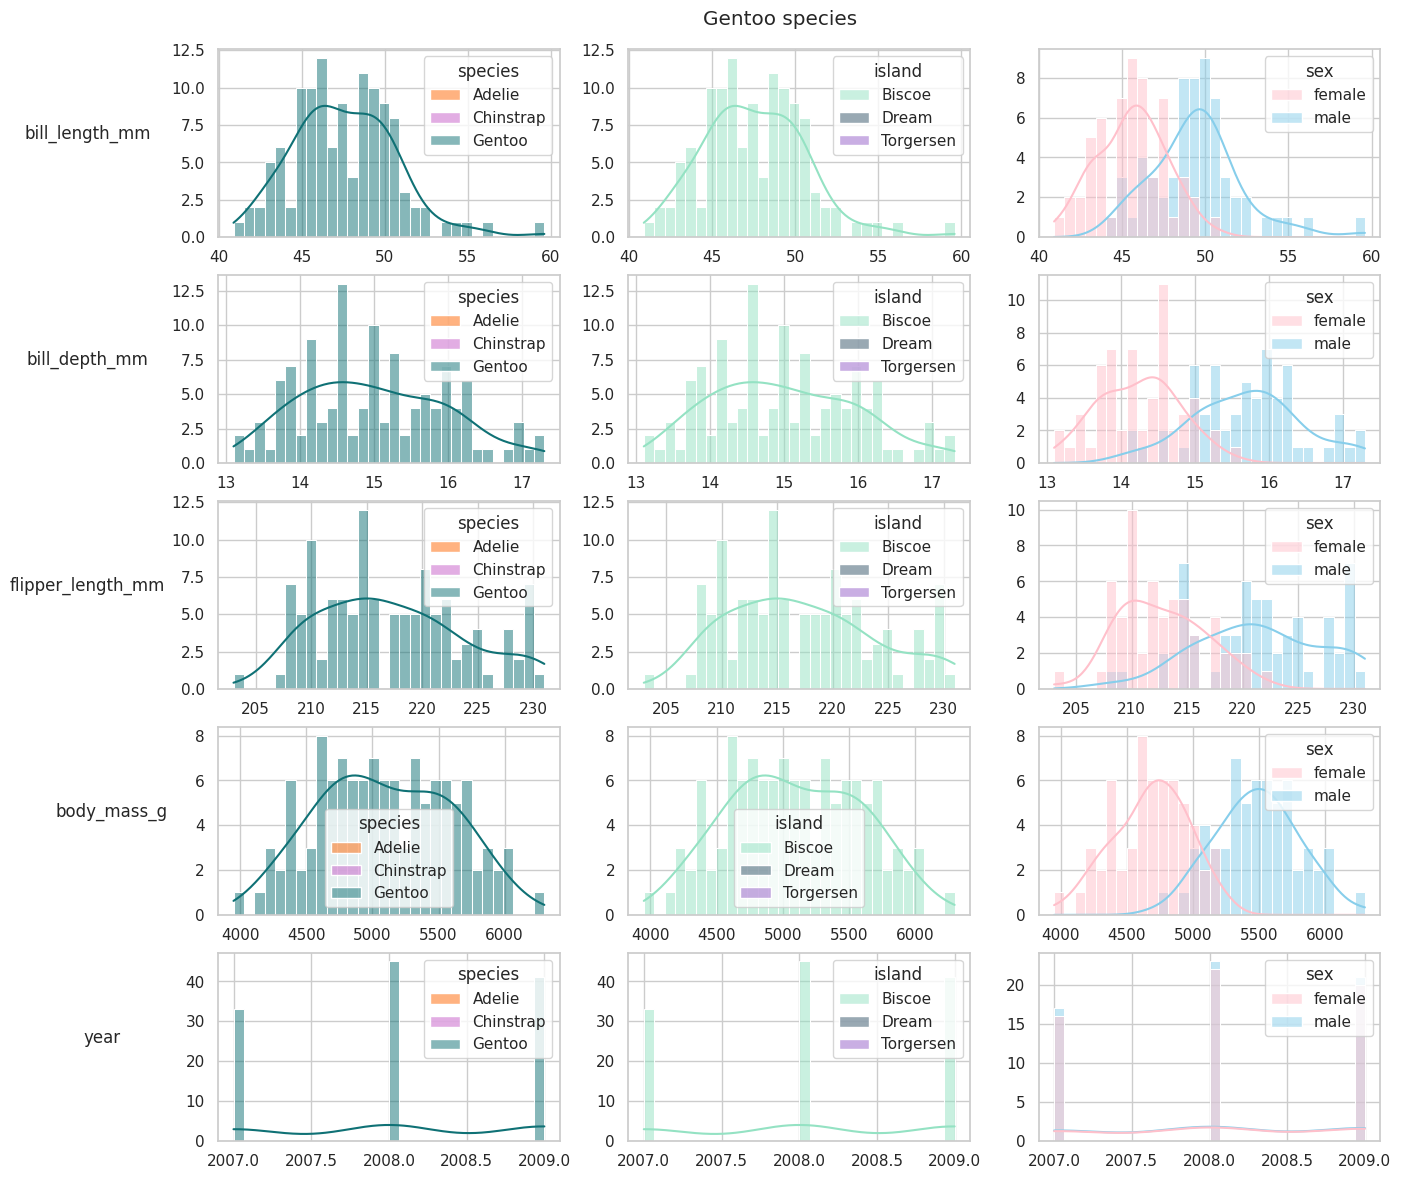

In [ ]:
# Plot the Gentoo species distributions
fig,ax = plt.subplots(len(numerical_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numerical_columns):
    for j, j_col in enumerate(category_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins[gentoo],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )

        ax[i][j].set_ylabel(numerical_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

fig.suptitle('Gentoo species');
plt.subplots_adjust(top=0.95);

# Plot the island distributions

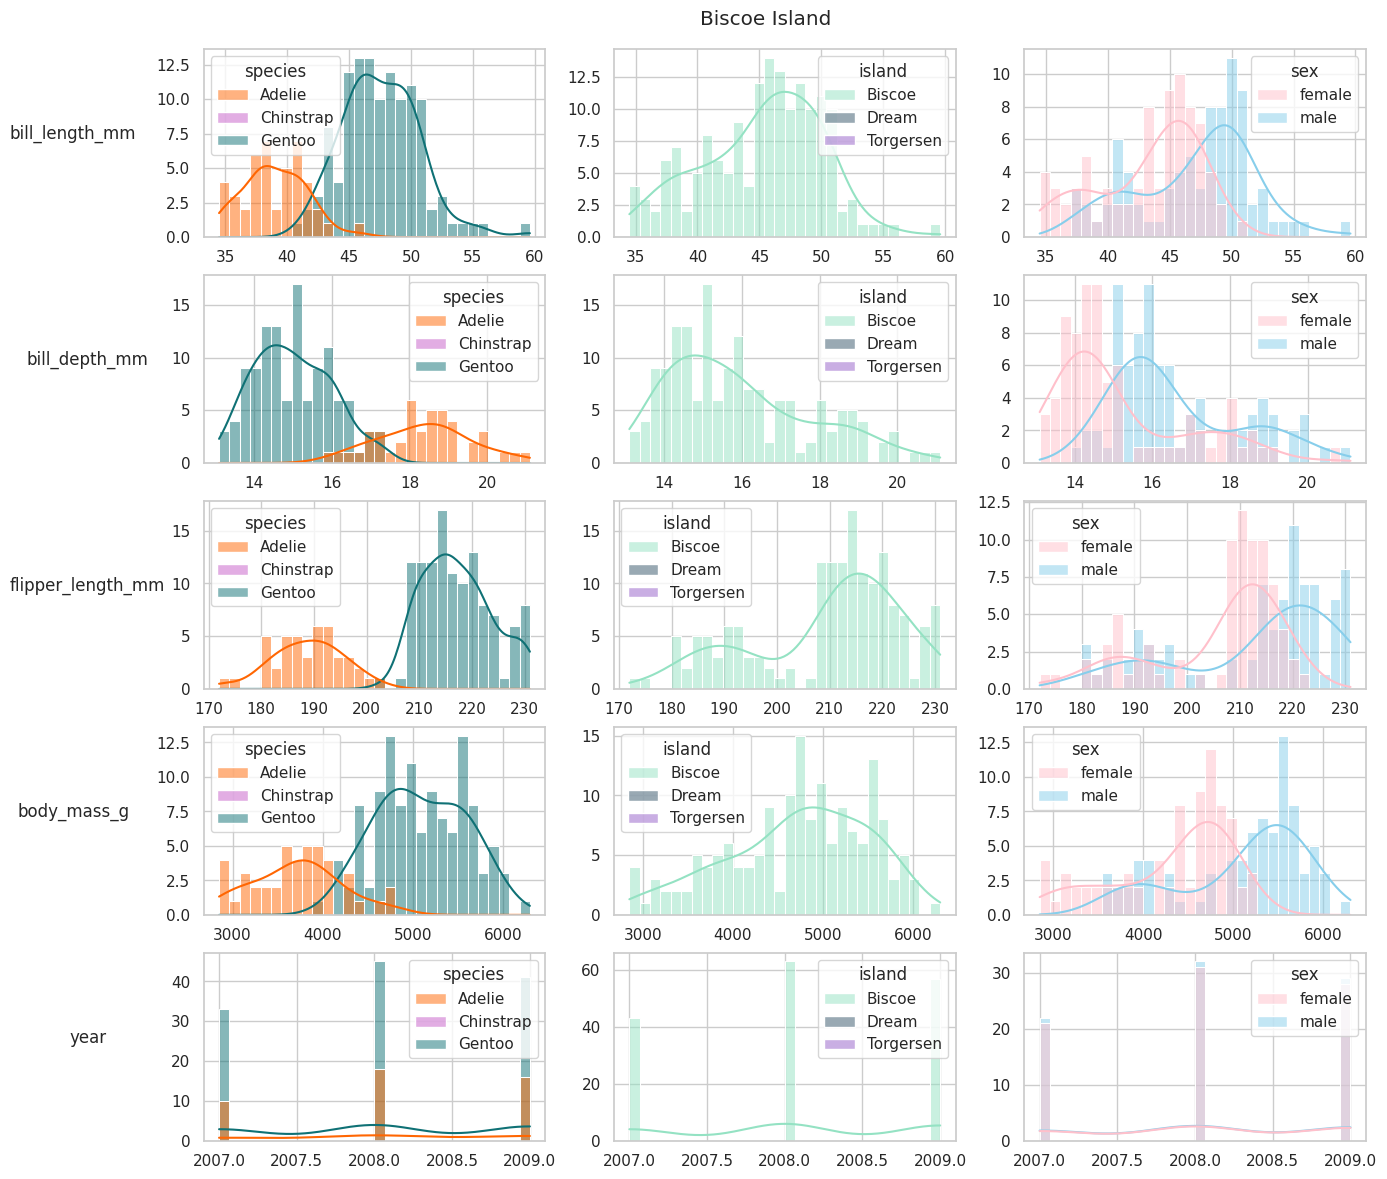

In [ ]:
# Plot Biscoe island distribution
fig,ax = plt.subplots(len(numerical_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numerical_columns):
    for j, j_col in enumerate(category_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins[biscoe],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )

        ax[i][j].set_ylabel(numerical_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

fig.suptitle('Biscoe Island');
plt.subplots_adjust(top=0.95);

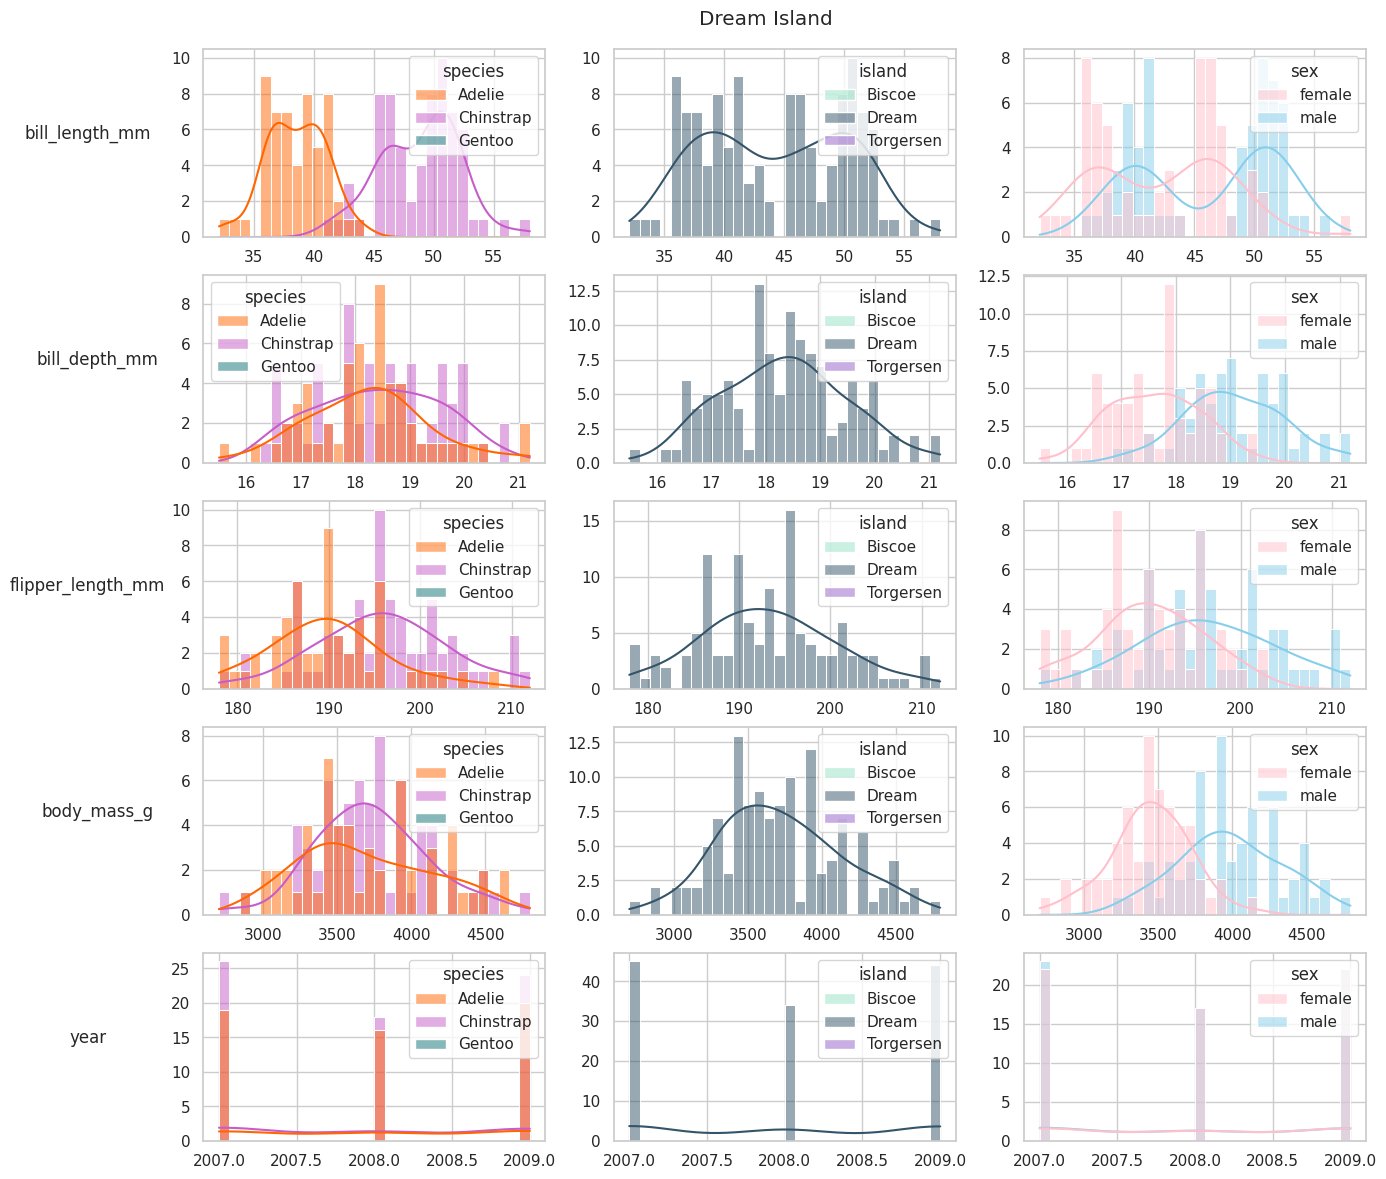

In [ ]:
# Plot the Dream Island distribution
fig,ax = plt.subplots(len(numerical_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numerical_columns):
    for j, j_col in enumerate(category_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins[dream],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )

        ax[i][j].set_ylabel(numerical_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

fig.suptitle('Dream Island');
plt.subplots_adjust(top=0.95);

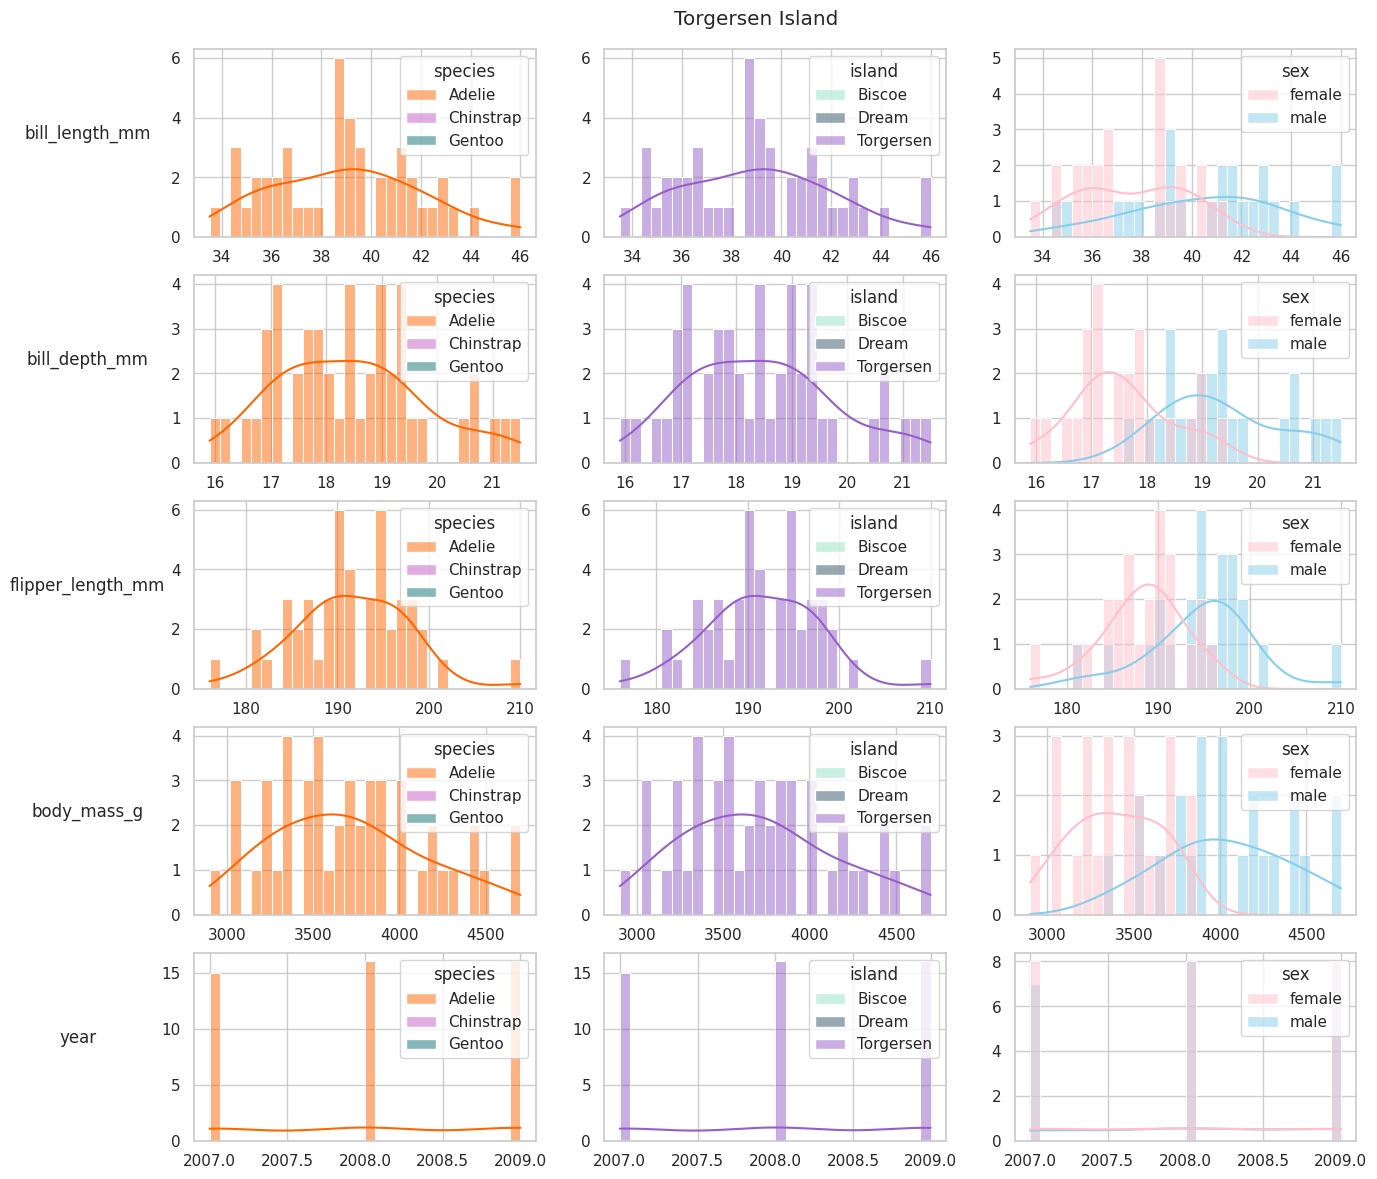

In [ ]:
# Plot Torgersen Island distributions
fig,ax = plt.subplots(len(numerical_columns),len(species), figsize=(15,13))
bins = 20
for i, i_col in enumerate(numerical_columns):
    for j, j_col in enumerate(category_columns):
        sns.histplot(
            ax=ax[i][j],
            data=penguins[torgersen],
            x=i_col,
            hue=j_col,
            multiple='layer',
            bins=30,
            kde=True,
            palette=penguin_color,
            )

        ax[i][j].set_ylabel(numerical_columns[i], labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel(None)
        ax[i][j].set_xlabel(None)

fig.suptitle('Torgersen Island');
plt.subplots_adjust(top=0.95);

**Conclusions**

When analyzing the characteristics of the penguins by species or island, they tend to have a bimodal distribution, but analyzing it by the sex of the penguin, the numerical variables analyzed mostly found a normal distribution for each species.

# Correlation between Variables

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 17.0 KB


In [ ]:
# Convert categories to numerical
dummies = pd.get_dummies(penguins).iloc[:,4:13]

In [ ]:
# Concatanate dummies with penguins
dummies_df = pd.concat([penguins, dummies], axis=1)

In [ ]:
dummies_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  year  species_Adelie  species_Chinstrap  \
0         3750.0    male  2007  2007               1                  0   
1         3800.0  female  2007  2007               1                  0   
2         3250.0  female  2007  2007               1                  0   
4         3450.0  female  2007  2007               1                  0   
5         3650.0    male  2007  2007               1                  0   
..           ...     ...   ...   ...             ...                ...   
339       4000.0    male  2009  2009               0                  1   
340       3400.0  female  2009  2009               0                  1   
341       3775.0    male  2009  2009               0                  1   
342       4100.0    male  2009  2009               0                  1   
343       3775.0  female  2009  2009               0                  1   

     species_Gentoo  island_Biscoe  island_Dream  island_Torgersen  \
0                 0              0             0                 1   
1                 0              0             0                 1   
2                 0              0             0                 1   
4                 0              0             0                 1   
5                 0              0             0                 1   
..              ...            ...           ...               ...   
339               0              0             1                 0   
340               0              0             1                 0   
341               0              0             1                 0   
342               0              0             1                 0   
343               0              0             1                 0   

     sex_female  sex_male  
0             0         1  
1             1         0  
2             1         0  
4             1         0  
5             0         1  
..          ...       ...  
339           0         1  
340           1         0  
341           0         1  
342           0         1  
343           1         0  

[333 rows x 17 columns]

In [ ]:
dummies_df.shape, penguins.shape

((333, 17), (333, 8))

In [ ]:
for col in penguins.columns:
  print(col)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


In [ ]:
for col in dummies_df.columns:
  print(col)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year
year
species_Adelie
species_Chinstrap
species_Gentoo
island_Biscoe
island_Dream
island_Torgersen
sex_female
sex_male


In [ ]:
dummies_df = dummies_df.drop('year', axis=1)

<Axes: >

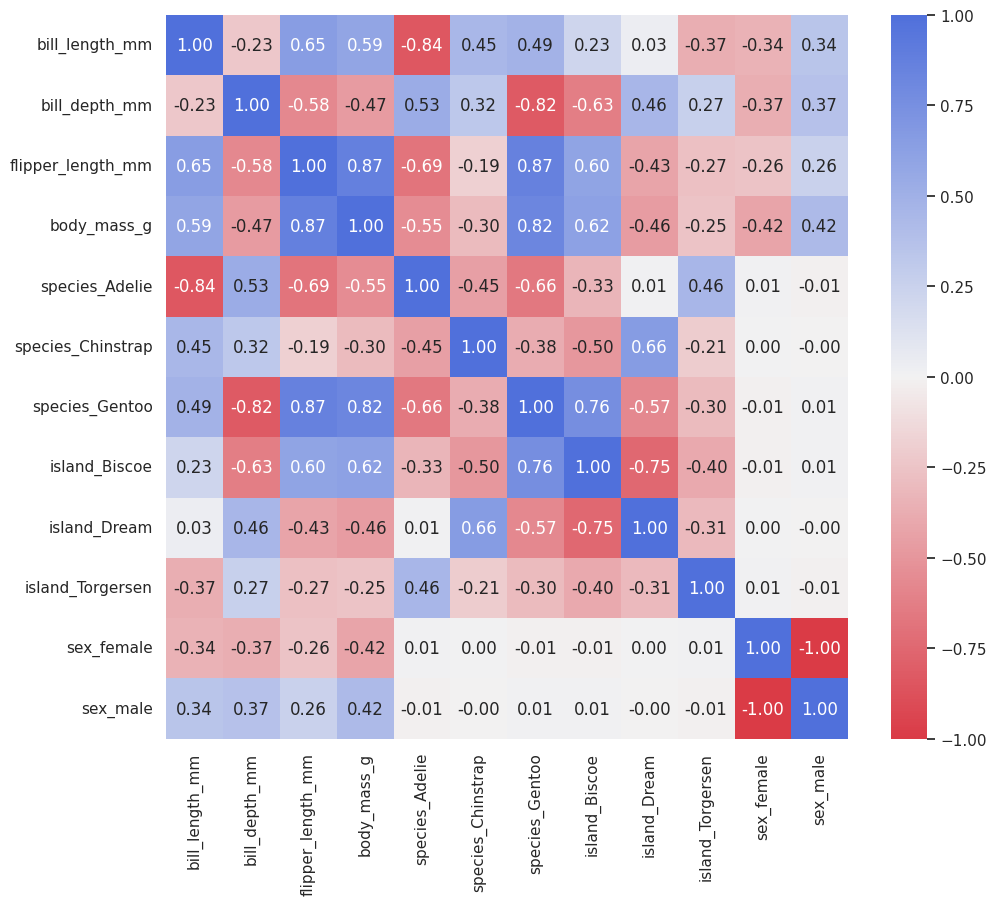

In [ ]:
## Correlation matrix
sns.heatmap(
    data=dummies_df.corr(),
    annot=True,
    cmap=sns.diverging_palette(10,260, as_cmap=True),
    fmt='.2f'
    )

# Exploring the Correlations

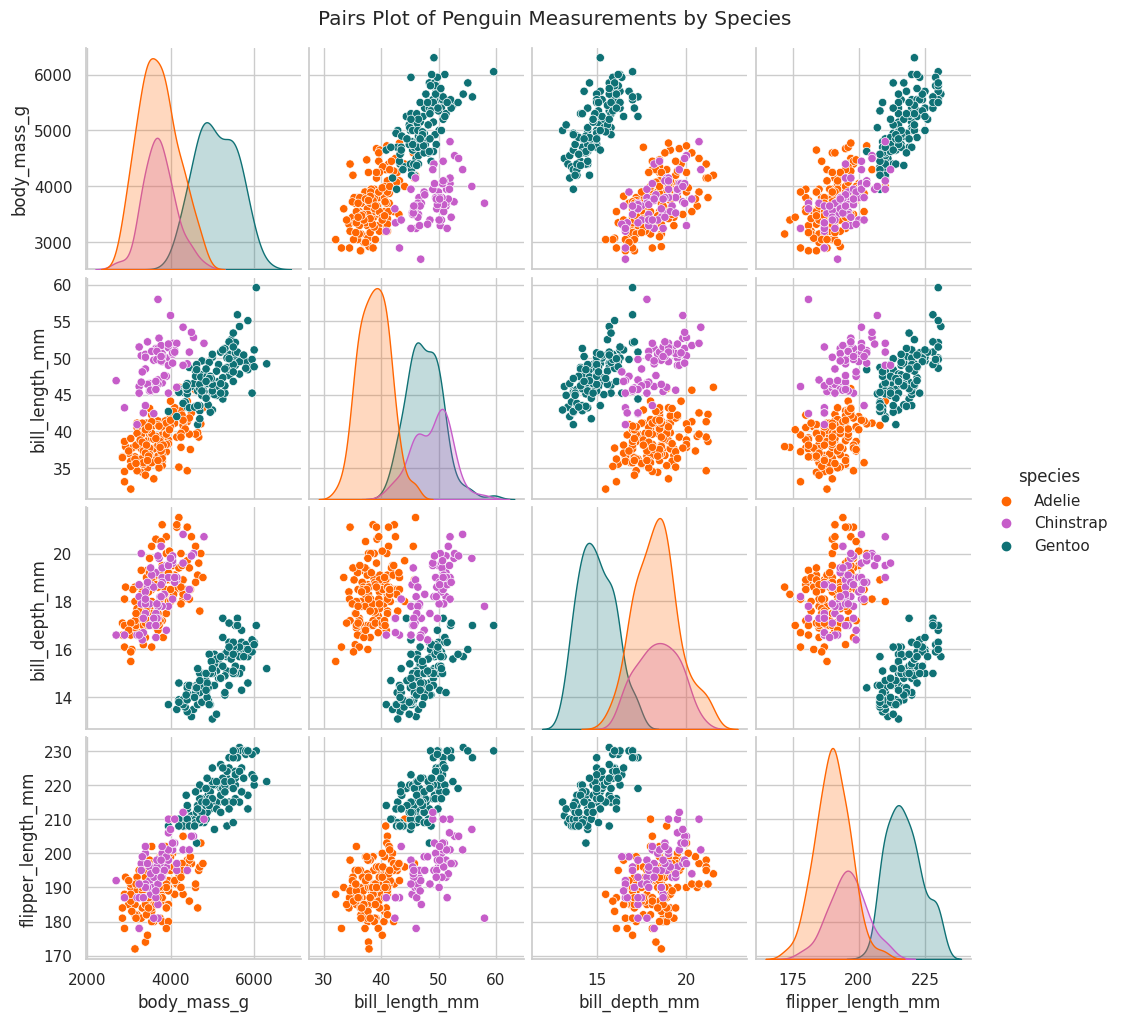

In [ ]:
# Plot the correlations graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns from the DataFrame
selected_columns = penguins[['species', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]


# Create a pairs plot with colored points
pairs_plot = sns.pairplot(selected_columns, hue='species', palette=penguin_color)

# Set the title of the plot
pairs_plot.fig.suptitle('Pairs Plot of Penguin Measurements by Species', y=1.02)

# Show the plot
plt.show()


#**Predictive Modeling**

After gaining insights from EDA and visualizations, I can now move on to predictive modeling. This involves building machine learning models to make predictions based on the available data. Since I had earlier mentioned that I'll perform predictive modeling later, here's a general outline of the steps involved:

1. *Data Preprocessing:* Prepare  data for modeling. This includes handling missing values, encoding categorical variables (e.g., using one-hot encoding), and splitting the data into training and testing sets.

2. *Feature Selection/Engineering:* Choose relevant features that will contribute to your predictive task. I might also create new features if they can improve model performance.

3. *Model Selection:* Choose appropriate machine learning algorithms for the task. For example, I  could use decision trees, random forests, support vector machines, or neural networks. The choice depends on the nature of the problem (classification, regression, etc.) and the characteristics of data.

4. *Model Training:* Training selected models using the training data.

5. *Model Evaluation:* Evaluate the performance of  models using metrics like accuracy, precision, recall, F1-score (for classification tasks), or mean squared error, R-squared (for regression tasks). Cross-validation can help estimate the model's generalization performance.

6. *Hyperparameter Tuning:* Fine-tune the hyperparameters of the models to optimize their performance.

7. *Prediction:* Use trained model to make predictions on new or unseen data.


### Predicting the sex of the penguins using Logistic regression

In [ ]:
# Import Libraries
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**NOTE:** Remember that the penguins data is unbalanced. If I proceed without fixing it, it will result in unresolved issues

In [ ]:
print(f'''
Proportion Penguins
{((dummies_df['species'].value_counts()/len(dummies_df)).sort_values(ascending=False))}
      ''')


Proportion Penguins
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64
      


### How to fix the imbalance?
Use stratified sampling


In [ ]:
#  Create Stratified Sampling Function
def data_strat(dummies_df, strat_columns_name, strat_values, prop_strat, random_state=None):

    df_strat = pd.DataFrame(columns=dummies_df.columns) # Create an empty data frame with the names of the columns of dummie_df

    pos = -1
    for i in range(len(strat_values)): # Iterate over the input of stratified values
        pos += 1
        if pos == len(strat_values) -1:
            ratio_len = len(dummies_df) - len(df_strat) # Calculates the number of output values having the same number of rows as input
        else:
            ratio_len = int(len(dummies_df) * prop_strat[i]) # calculates the number of rows according to the desired ratio

        df_filter = dummies_df[dummies_df[strat_columns_name] == strat_values[i]] # filters the source data based on the values selected in the data layer
        df_temp = df_filter.sample(replace=True, n=ratio_len, random_state=random_state) # sample the filtered data using the ratio we have calculated

        df_strat = pd.concat([df_strat, df_temp]) # concat the sample tables with the stratified one to produce the final result

    return df_strat # Return the stratified, re-sampled data



In [ ]:
# Define the proportions  of the penguins for sampling
strat_values = ['Adelie', 'Chinstrap', 'Gentoo']


In [ ]:
strat_prop = [0.33, 0.33, 0.33]

In [ ]:
df_strat = data_strat(dummies_df, 'species', strat_values, strat_prop, random_state=42)


In [ ]:
print(f'''
Proportion Sample Penguins
{((df_strat['species'].value_counts()/len(df_strat)).sort_values(ascending=False))}
      ''')


Proportion Sample Penguins
Gentoo       0.345345
Adelie       0.327327
Chinstrap    0.327327
Name: species, dtype: float64
      


In [ ]:
# Logistic Regressing Predictive Model
train,test = train_test_split(dummies_df, train_size=0.5, random_state=1)

for i,i_col in enumerate(test.iloc[:,7:15]):
    test[i_col] = pd.to_numeric(test[i_col])
    train[i_col] = pd.to_numeric(train[i_col])

In [ ]:
logit_model = logit(
    formula='sex_male ~ flipper_length_mm + body_mass_g + bill_length_mm + bill_depth_mm + species_Adelie + species_Chinstrap + species_Gentoo + island_Biscoe + island_Dream + island_Torgersen',
    data=train
).fit()

test_predict = logit_model.predict(test).round()

Optimization terminated successfully.
         Current function value: 0.140972
         Iterations 10


In [ ]:
# Model accuracy
accuracy_score(
    test.sex_male,
    test_predict
)

0.8862275449101796

### Alternatively I can use another to train the model and make predictions

In [ ]:
# Create a binary where 1 = male and 0 = female
penguins_2 = penguins.copy()
penguins_2['target'] = [1 if x=='male' else 0 for  x in penguins_2.sex]

In [ ]:
# Check the copied dataset
penguins_2

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  target  
0         3750.0    male  2007       1  
1         3800.0  female  2007       0  
2         3250.0  female  2007       0  
4         3450.0  female  2007       0  
5         3650.0    male  2007       1  
..           ...     ...   ...     ...  
339       4000.0    male  2009       1  
340       3400.0  female  2009       0  
341       3775.0    male  2009       1  
342       4100.0    male  2009       1  
343       3775.0  female  2009       0  

[333 rows x 9 columns]

In [ ]:
# Dropt the sex columns entirely
penguins_2.drop('sex', axis=1, inplace=True)
penguins_2

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g  year  target  
0         3750.0  2007       1  
1         3800.0  2007       0  
2         3250.0  2007       0  
4         3450.0  2007       0  
5         3650.0  2007       1  
..           ...   ...     ...  
339       4000.0  2009       1  
340       3400.0  2009       0  
341       3775.0  2009       1  
342       4100.0  2009       1  
343       3775.0  2009       0  

[333 rows x 8 columns]

In [ ]:
# Set the random seed
np.random.seed(42)

In [ ]:
# Create X and y
X = penguins_2.drop('target', axis=1)
y = penguins_2['target']


In [ ]:
X = pd.get_dummies(X)


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Import the model
from sklearn.linear_model import LinearRegression


In [ ]:
# Instantiate the model
model = LinearRegression()


In [ ]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.6462393970759502

The model scores a 64% accuracy.

### Using KNN instead of logistic regression


In [ ]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier()
model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
model_2.score(X_train,y_train)

0.8270676691729323

From the above score, it is clear that KNN performs much better than logistic regression with an 82% accuracy

# Confusion matrix

<Axes: title={'center': 'Confusion Matrix'}>

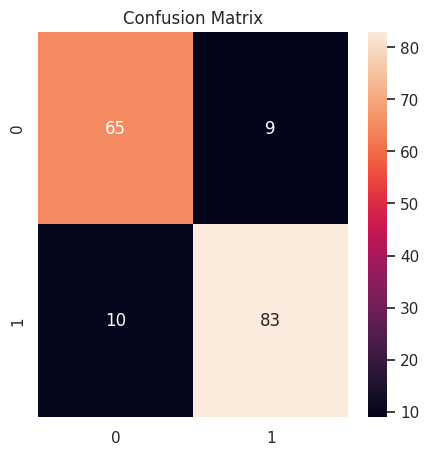

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(
    confusion_matrix(test['sex_male'], test_predict),
    annot=True
)

The model was able to predict the sex of the penguins with 88% accuracy. Now, I will use the same model to predict the sex of the eight penguins that used all their characteristics but not their sex.

**Observations:**

The main features that can help us to identify the sex of a penguin are the flipper length, body mass, species and dimensions of the bill.

The island gives us a little more precision when it comes to inferring the sex of the penguin, but having this information or not does not harm the model.
